<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *5*: *Naive Bayes & KNN Classification***

###**Tenggat Waktu: 4 November 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab5_NPM_Nama.ipynb**. Contoh: A_Lab5_2106123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **26 Maret 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

# **Pertanyataan Integritas**

In [288]:
# Isi dengan data diri Anda
NAMA = "Valencius Apriady Primayudha"
KELAS = "B"
NPM = "2106750830"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [289]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Valencius Apriady Primayudha dari kelas B dengan NPM 2106750830, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Valencius Apriady Primayudha)


# Naive Bayes

## A. Pengenalan Naive Bayes

Tugas Anda kali ini adalah mengimplementasi Naive Bayes Classifier dan melakukan pengukuran kinerja model. Mari kita sekilas mempelajari tentang Naive Bayes Classifier terlebih dahulu.




 Algoritma Naive Bayes memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya sehingga dikenal sebagai Teorema Bayes. Ciri utama dari Naive Bayes Classifier ini adalah asumsi yg sangat kuat akan independensi dari masing-masing kondisi/kejadian.

Bayangkan bahwa Anda ingin membentuk classifier yang memprediksi golongan darah seseorang (A? B? AB? atau O?) berdasarkan sifat karakter seseorang (arogan? perhatian? teliti? cerdas? sabar?). Anda akan membentuk sebuah kuesioner kepribadian dan memberikan kuesioner tersebut ke orang-orang. Kuesioner tersebut dikumpulkan untuk menghasilkan sebuah dataset. Anggaplah
bahwa Kak Lulu mengatakan kepada Anda bahwa dia adalah orang yang perhatian, cerdas, teliti, dan sabar. Bisakah Anda memanfaatkan informasi dari kuesioner yang Anda kumpulkan untuk memprediksi golongan darah Kak Lulu?.

Salah satu cara untuk memprediksi golongan darah Kak Lulu adalah dengan menggunakan teorema Naive Bayes. Jika saya ingin menghitung peluang golongan darah Kak Lulu adalah O karena diketahui Kak Lulu adalah orang yang perhatian, rumus probabilitas yang dapat digunakan adalah Bayes Rule yang ditunjukkan di bawah ini.





$$
p(O \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid O)p(O)}{\sum_{O'} p(O')p(\text{perhatian} \mid O')}
$$

Ketiga nilai tersebut bisa dihitung berdasarkan data yang dikumpulkan dari kuesioner. Umumnya, kita
tidak hanya menghitung P(O | perhatian), tetapi juga menghitung P(A | perhatian) , P(B | perhatian), dan P(AB | perhatian). Setelah kita hitung empat-empatnya, golongan darah yang peluangnya paling besar itulah yang kita
prediksi sebagai golongan darah Kak Lulu.

Namun, peneliti biasanya ingin rumus yang jumlah variabelnya sedikit mungkin. Kalau kita pikirkan lebih lanjut, penyebut dari p(O|perhatian) dibagi oleh p(perhatian). Sama halnya, p(A | perhatian), p(B | perhatian), dan P(AB | perhatian) juga dibagi dengan p(perhatian) seperti yang dapat dilihat pada rumus-rumus di bawah ini.


$$
p(A \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid A)p(A)}{p(\text{perhatian})}
$$

$$
p(B \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid B)p(B)}{p(\text{perhatian})}
$$

$$
p(AB \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid AB)p(AB)}{p(\text{perhatian})}
$$

$$
p(O \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid O)p(O)}{p(\text{perhatian})}
$$

**Konsep yang perlu diperhatikan:**

* `p(A | perhatian)` disebut sebagai posterior distribution
* `p(A)` sebagai prior distribution

* `Marginalization`: "menghitung" atau "menjumlahkan" probabilitas dari suatu variabel acak berdasarkan distribusi probabilitas bersama dengan variabel lain sebagai contoh:
> $$
p(X) = \sum_{y} p(X, Y = y)
$$


**Konsep Tambahan: Class Conditional Density**

Dalam konteks pembelajaran mesin dan statistik, densitas kondisional kelas mengacu pada fungsi densitas probabilitas (PDF) dari suatu fitur atau variabel tertentu yang diberikan kelas atau kategori tertentu. Ini digunakan dalam masalah klasifikasi di mana Anda ingin memodelkan distribusi probabilitas fitur dalam setiap kelas untuk membuat prediksi.

Secara sederhana, ini adalah distribusi probabilitas dari suatu fitur yang diberikan kelas tertentu. Sebagai contoh, dalam masalah klasifikasi biner dengan dua kelas (Kelas A dan Kelas B), densitas kondisional kelas dari suatu fitur (misalnya, tinggi) akan menggambarkan bagaimana tinggi individu didistribusikan dalam setiap kelas. Ini memungkinkan Anda untuk menilai kemungkinan mengamati nilai tertentu dari fitur dalam kelas tertentu.

Secara matematis, Anda dapat menunjukkan densitas kondisional kelas sebagai P(X | C), di mana X adalah fitur, dan C adalah kelas. Ini menggambarkan kemungkinan mengamati nilai tertentu dari fitur X dengan asumsi bahwa data tersebut termasuk dalam kelas C.

Jika keempat variabel memiliki pembagi yang sama, bukankah ini artinya urutan nilai P(A|perhatian),
P(B|perhatian) , P(AB|perhatian), dan P(O|perhatian) dari yang terbesar sampai yang terkecil tidak akan berubah meskipun penyebutnya (p(perhatian)) dicoret? Sehingga kita tidak perlu untuk menghitung nilai dari p(perhatian).

$$
p(O \mid \text{perhatian}) ∝ p(\text{perhatian}\mid O) p(O)
$$

Perhatikan rumus di atas (rumus ketika pembagian dengan P(perhatian) dihilangkan).
Nilai ini hanya menghitung probabilitas mempunyai golongan darah O bila hanya faktor bahwa Kak Lulu itu perhatian diperhitungkan. Bagaimana faktor seperti cerdas, sabar, teliti, atau sifat
seseorang lainnya? Secara matematis, kita bisa membuatnya menjadi seperti ini.


\begin{align}
p(O \mid P,T,S,C) &\propto p(O)p(P,T,S,C\mid O)
\end{align}


Keterangan :
*   T: teliti
*   C: cerdas
*   S: Sabar
*   P: perhatian
*   O: golongan darah O






Untungnya, dalam konteks Naive Bayes Classifier, kita dapat mengasumsikan bahwa faktor seperti
teliti, cerdas, dan sebagainya saling conditionally independent atau independensi bersyarat jika O diketahui. Artinya, rumus di atas bisa disimplifikasi sebagai berikut:

\begin{align}
p(P,T,S,C \mid O) = p(P\mid O) p(T \mid O) p(S \mid O) p(C \mid O)
\end{align}

Dengan demikian, berlaku bahwa


\begin{align}
p(O \mid P,T,S,C) &\propto p(O) p(P,T,S,C \mid O) \\
&= p(O) p(P\mid O)  p(T \mid O) p(S \mid O) p(C \mid O)
\end{align}

## B. Pengenalan Naive Bayes Dalam Sckitlearn

Scikit-learn menyediakan beberapa variasi model naive bayes yang dapat digunakan, antara lain


| Nama Model | Nama Modul |
| ----------- | --------- |
| Gaussian Naive Bayes | `sklearn.naive_bayes.GaussianNB` |
| Multinomial Naive Bayes | `sklearn.naive_bayes.MultinomialNB` |
| Complement Naive Bayes | `sklearn.naive_bayes.ComplementNB` |
| Bernoulli Naive Bayes | `sklearn.naive_bayes.BernoulliNB` |
| Categorical Naive Bayes | `sklearn.naive_bayes.CategoricalNB` |

Adapun kegunaan masing-masing model antara lain:
- Gaussian Naive Bayes,
Model ini mengasumsikan bahwa class conditional density (distribusi fitur untuk masing-masing kelas) mengikuti distribusi Gaussian (distribusi kontinu).
Model ini cocok digunakan untuk  data numerik yang mengikuti distribusi gaussian dan kontinu.

- Multinomial Naive Bayes,
Asumsi data yang digunakan bahwa class conditional density mengikuti distribusi multinomial.
Distribusi multinomial menggambarkan probabilitas dari jumlah data pada sejumlah kategori sehingga model naive bayes ini cocok digunakan pada fitur yang merepresentasikan jumlah maupun laju pertambahan. Distribusi ini generalisasi dari distribusi Binomial, tapi untuk data dengan kategori lebih dari 2. Contohnya yaitu pada klasifikasi text dimana fitur-fitur yang ada berkaitan dengan frekuensi kata pada dokumen yang ingin diklasifikasikan.

- Complement,
Complement naive bayes mirip seperti multinomial naive bayes. Model ini ada karena model multinomial naive bayes tidak memiliki performa yang baik untuk dataset yang imbalanced dimana distribusi data tidak uniform. Akibatnya model tersebut data dengan mudah overfiting mengikuti data yang jumlahnya jauh lebih banyak. Model complement naive bayes ini cocok digunakan untuk dataset yang imbalanced.
https://towardsdatascience.com/comparing-a-variety-of-naive-bayes-classification-algorithms-fc5fa298379e

- Bernoulli Naive Bayes,
Bernouli mirip seperti multinomial namun data memiliki bentuk yang diskret dan terdistribusi dalam bentuk binary misalnya pada data gender, binary hot encoding, dll. https://iq.opengenus.org/bernoulli-naive-bayes/

- Categorical Naive Bayes,
Model naive bayes untuk tipe data yang nilainya terdistribusi secara kategorikal. Jika data-data yang dimiliki bersifat kontinu maka harus ditransformasikan dalam bentuk diskret terlebih dahulu untuk menggunakan model ini. Misalnya yaitu data warna mata, ras, golongan darah, dll.
https://inblog.in/Categorical-Naive-Bayes-Classifier-implementation-in-Python-dAVqLWkf7E


Selengkapnya dapat dilihat pada dokumentais modul [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html).

## C. Hands-on Naive Bayes

Dataset didalam example.csv berisi tentang informasi dilakukannya operasi caesar atau tidak dari 80 ibu hamil dengan karakteristik masalah persalinan yang penting di bidang medis.

Informasi dataset:

`Age` = Umur

`Delivery No` = Status (Tepat waktu, prematur, terlambat)

`Blood of Pressure` = Tekanan Darah (rendah, normal, tinggi)

`Heart Problem` = Memiliki masalah penyakit jantung (apt, inept)

`Cesarian` = Dilakukan operasi caesar (ya, tidak)

Sumber dataset : https://www.kaggle.com/amir75/caesarean-section-classification


### Import Dataset

In [290]:
# import library dan data
import pandas as pd
import numpy as np
caesarian = pd.read_csv("example.csv")
caesarian.head()

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,Timely,High,apt,No
1,26,Timely,Normal,apt,Yes
2,26,Premature,Normal,apt,No
3,28,Timely,High,apt,No
4,22,Timely,Normal,apt,Yes


In [291]:
#Mencari jumlah nilai unik pada kolom yang bertipe kategorik

for col in caesarian.select_dtypes(include=object).columns:
    print('No. of unique values in column '+col+':')
    print(caesarian[col].value_counts(),'\n')

No. of unique values in column Delivery No:
Delivery No
Timely       46
Premature    17
Latecomer    17
Name: count, dtype: int64 

No. of unique values in column Blood of Pressure:
Blood of Pressure
Normal    40
High      20
Low       20
Name: count, dtype: int64 

No. of unique values in column Heart Problem:
Heart Problem
apt      50
inept    30
Name: count, dtype: int64 

No. of unique values in column Caesarian:
Caesarian
Yes    46
No     34
Name: count, dtype: int64 



### Independent Variable dan Dependent Variable

Pada langkah ini, kita akan menentukan variabel yang menjadi variabel independen dan dependen. Variabel dependen akan menjadi target sedangkan variabel independen akan menjadi fitur. Variabel caesarian menjadi variabel dependen dan variabel lainnya menjadi variabel independen.

Karena data yang diberikan bertipe kategorik, maka kita perlu melakukan transformasi supaya data dapat diolah oleh mesin. Ada beberapa teknik transformasi yang dapat dilakukan, diantaranya : <br>
* One hot encoding
* Label encoding (Natural Progression)
* Vector encoding
* etc


Pada kasus kali ini kita menggunakan one hot encoding dengan tujuan agar data dapat lebih dimengerti dengan baik tanpa memperhatikan atau terkena dampak urutan.

In [292]:
from sklearn.preprocessing import LabelEncoder

In [293]:
# Proses Encoding menggunakan Label encoding
le = LabelEncoder()

disc_col = [column for column in caesarian.columns if column != 'Age']

for col in disc_col:
  caesarian[col] = le.fit_transform(caesarian[col])

caesarian

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,2,0,0,0
1,26,2,2,0,1
2,26,1,2,0,0
3,28,2,0,0,0
4,22,2,2,0,1
...,...,...,...,...,...
75,27,1,2,0,0
76,33,2,2,0,1
77,29,1,0,0,1
78,25,0,1,0,1


In [294]:
# Variabel independen
x = caesarian.drop(["Caesarian"], axis = 1)
x.head()

,Age,Delivery No,Blood of Pressure,Heart Problem
0,22,2,0,0
1,26,2,2,0
2,26,1,2,0
3,28,2,0,0
4,22,2,2,0


In [295]:
# Variabel dependen
y = caesarian["Caesarian"]
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Caesarian, dtype: int32

### Classification
Klasifikasi menggunakan naive bayes terdapat dalam package sklearn. Dalam pengklasifikasian ini dibutuhkan data testing dan data training. Kita akan mengambil 20% dari data yang ada sebagai test.  Berikut adalah kode program untuk menentukan data testing dan data training.

In [296]:
# Melakukan splitting terhadap data train dan test (0.2 test_size)

from sklearn.model_selection import train_test_split, KFold, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y,random_state = 123)

Kemudian kita akan melakukan cross validation dengan number_split = 5. Cross Validation digunakan untuk membagi dataset menjadi beberapa bagian (*fold*). Strategi ini dapat Anda gunakan untuk dapat menghasilkan model yang lebih stabil performance-nya serta dapat juga digunakan untuk menghindari overfitting data.

In [297]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Setelah itu kita akan mengaktifkan/memanggil/membuat fungsi klasifikasi naive bayes, mengevaluasi hasil kfold, dan memasukkan data training pada fungsi klasifikasi gaussian naive bayes.

In [298]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

continuous_cols = ['Age']
discrete_cols   = [col for col in caesarian.columns if col not in continuous_cols and col != 'Caesarian']

x_train_continuous = x_train[continuous_cols]
x_train_discrete   = x_train[discrete_cols]

x_test_continuous = x_test[continuous_cols]
x_test_discrete   = x_test[discrete_cols]

In [299]:
model_gnb = GaussianNB() # For numeric
model_gnb.fit(x_train_continuous, y_train)

GaussianNB()

In [300]:
model_cnb = CategoricalNB() # For categorical
model_cnb.fit(x_train_discrete, y_train)

CategoricalNB()

Langkah selanjutnya yang akan kita lakukan adalah menentukan hasil prediksi dari x_test namun karena fitur didalamnya bersifat campuran, maka kita akan melakukan treatment yang berbeda antara fitur kontinu dan fitur diskrit lalu kemudian akan menggabungkan keduanya.

In [301]:
categorical_posteriors = model_cnb.predict_proba(x_test_discrete)
numerical_posteriors   = model_gnb.predict_proba(x_test_continuous)

combined_probabilities = categorical_posteriors * numerical_posteriors

# Get the class with the highest combined probability as the final prediction
# Bisa dikatakan juga sebagai hasil prediksi dari data uji yang ada
final_predictions = np.argmax(combined_probabilities, axis=1)
final_predictions

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

Output kode program y_pred adalah hasil prediksi operasi caesar. Kemudian, hasil tersebut akan kita bandingkan dengan data aktualnya, yaitu y_test dengan menggunakan kode program berikut ini.

In [302]:
# Array data test
np.array(y_test)

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0])

### Classification Report

Setelah model kita training dan kita testing, kita akan mengevaluasi sebagus apa si model yang telah kita bangun tersebut. Ada beberapa nilai yang perlu kita perhatikan disini, yaitu accuracy, f1-score, recall, dan precision. Kita juga akan menampilkan confusion matrix untuk melihat ketepatan prediksi dengan lebih detail. Melalui report ini, kita dapat menentukan apakah model kita sudah optimal atau belum.

In [303]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [304]:
evaluate_classifier_performance(final_predictions,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.67      0.89      0.76         9

    accuracy                           0.69        16
   macro avg       0.71      0.66      0.65        16
weighted avg       0.70      0.69      0.67        16



Confusion Matrix



prediction,0,1
actual,,
0,3,4
1,1,8




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.6875
F1 Macro Average: 0.6536796536796536
F1 Micro Average: 0.6875
Precision Macro Average: 0.7083333333333333
Precision Micro Average: 0.6875
Recall Macro Average: 0.6587301587301587
Recall Micro Average: 0.6875



Berdasarkan report diatas, kita dapat melihat bahwa model kita ternyata tidak terlalu baik (<b>OH TIDAK!</b>). Terlihat dari accuracy yang tidak terlalu bagus, begitu juga dengan nilai-nilai yang lainnya. Ada beberapa kemungkinan penyebab, berikut adalah detailnya, <br>
* Dataset yang tidak balance <br>
Perbandingan jumlah tiap class yang di-train tidak seimbang, yang menyebabkan proses training menjadi bias dan terlalu condong pada class dengan jumlah yang lebih banyak <br>
* Pemilihan algoritma naive bayes yang kurang sesuai <br>
Algoritma yang digunakan tidak sesuai dengan sifat data kita, sehingga menghasilkan model yang tidak optimal. Beberapa algoritma hanya cocok untuk distribusi tertentu saja.
* Data Preprocessing yang tidak optimal <br>

# KNN (K-Nearest Neighbors)

## A. Pengenalan KNN

Sesuai dengan namanya (<i>nearest neighbors</i>), algoritma ini mengklasifikasikan suatu data baru dengan melihat kedekatan data tersebut terhadap data lama yang lainnya. Contoh, kamu mempunyai dataset yang berisi informasi rumah dengan label rumah mewah dan rumah tidak mewah. KNN akan menyimpan informasi mengenai ukuran yang serupa, seperti kemiripan luas rumah dan juga harga rumah. Ketika data rumah baru masuk, KNN akan mengecek kesamaan informasi data rumah tersebut terhadap data lama yang telah dipelajari KNN. Hasil pengecekan akan dijadikan sebagai kesimpulan rumah baru tersebut masuk ke dalam klasifikasi yang mana.

Apa saja yang perlu kita perhatikan sebelum mengimplementasikan KNN?
* <b>Jumlah K</b> <br>
Jumlah K sangat menentukan performa KNN. K merepresentasikan jumlah data point terdekat, yang akan digunakan untuk menentukan suatu data point masuk ke dalam kategori apa. K yang kecil sangat rentan dengan <i>noise</i> yang dapat membuat model overfitting, sedangkan K yang besar dapat merusak aspek <i>lokalitas</i> yang berujung ke penurunan performa model klasifikasi.<br>


* <b>Rumus Jarak yang digunakan</b> <br>
Rumus jarak yang digunakan untuk menghitung kedekatan data point terhadap data yang lainnya juga sangat menentukan performa dari algoritma KNN. Jika perhitungan jarak yang digunakan kurang sesuai, maka kalkulasi similarity akan tidak tepat dan berujung membuat klasifikasi menjadi tidak sesuai

## B. Pengenakan KNN Pada Scikit-Learn

Referensi : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Pada scikit-learn, ada beberapa parameter yang perlu kita perhatikan, berikut adalah rangkuman singkatnya.

* `n_neighbor` <br>
n_neighbor merepresentasikan jumlah K yang kita gunakan, dengan default nilai adalah 5 <br>
* `algorithm` <br>
parameter algorithm merepresentasikan algoritma yang digunakan dalam mencari tetangga terdekat. Algoritma yang tersedia adalah, ball tree, kd tree, brute force, dan auto. Default nilai dari parameter ini adalah auto <br>
* `p` <br>
parameter ini merepresentasikan parameter yang digunakan untuk metric. Jika menggunakan minkowski, maka p bernilai 1 digunakan untuk manhattan distance dan p bernilai 2 untuk euclidean distance. Default dari parameter ini adalah 2, yaitu euclidean distance <br>
* `metric` <br>
parameter ini digunakan untuk menentukan rumus jarak yang dipakai. Default dari nilai ini adalah minkowski. <br>

Kita perlu memperhatikan rumus jarak yang digunakan dan juga jumlah K yang optimal. Strategi yang dapat diterapkan untuk mencari nilai k yang optimal adalah dengan <b> cross validation </b> sedangkan untuk metric beserta parameternya bisa dipilih berdasarkan sifat data (jika semua numerik mungkin kita bisa memilih untuk menggunakan euclidean atau manhattan, dan jika semua kategorik bisa menggunakan jacard distance). Permasalahan yang selalu ditemukan saat mengimplementasikan KNN adalah, ketika independent variable yang ada terdiri dari data <b>kategorik</b> dan <b>numerik</b>. Banyak praktisi yang meyakini untuk menggunakan algoritma lain jika menemui masalah tersebut, seperti menggunakan algoritma decision tree, random forest, neural network, deep learning, dan lain-lain.

Dokumentasi mengenai terkait rumus jarak apa saja yang dapat digunakan, dapat diakses disini : <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

## C. Hands-on KNN

Kita akan coba mengimplementasikan KNN untuk mengklasifikasikan obat yang harus dikonsumsi oleh seorang pasien dengan menggunakan dataset `drug.csv` yang diambil dari:

(https://www.kaggle.com/datasets/danushkumarv/glass-identification-data-set)

dengan modifikasi

Berikut adalah informasi dari dataset diatas :

`RI` : Refractive Index

`Na` : Sodium (unit measurement: weight percent in the corresponding oxide, as
are attributes 4-10)

`Mg` : Magnesium

`Al` : Alumnium

`Si` : Silicon

`K` : Potassium

`Ca` : Calcium

`Ba` : Barium

`Fe` : Iron

`type` : Type of glass

### Import Dataset

In [305]:
glass = pd.read_csv('glass.csv').rename(columns={
    'Type of glass': 'type'
}).drop(columns=['Id'])
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [306]:
print("----Informasi Baris dan Kolom----")
print("Baris : ", glass.shape[0])
print("Kolom : ", glass.shape[1])

----Informasi Baris dan Kolom----
Baris :  214
Kolom :  10


### Preprocessing

In [307]:
# mengecek nilai null
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [308]:
check_null(glass)

Tidak ditemukan missing value pada dataset


In [309]:
glass.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [310]:
print("Jumlah duplikasi data : " + str(glass.duplicated().sum()))

Jumlah duplikasi data : 1


In [311]:
glass.drop_duplicates(inplace=True)

In [312]:
print("Jumlah duplikasi data : " + str(glass.duplicated().sum()))

Jumlah duplikasi data : 0


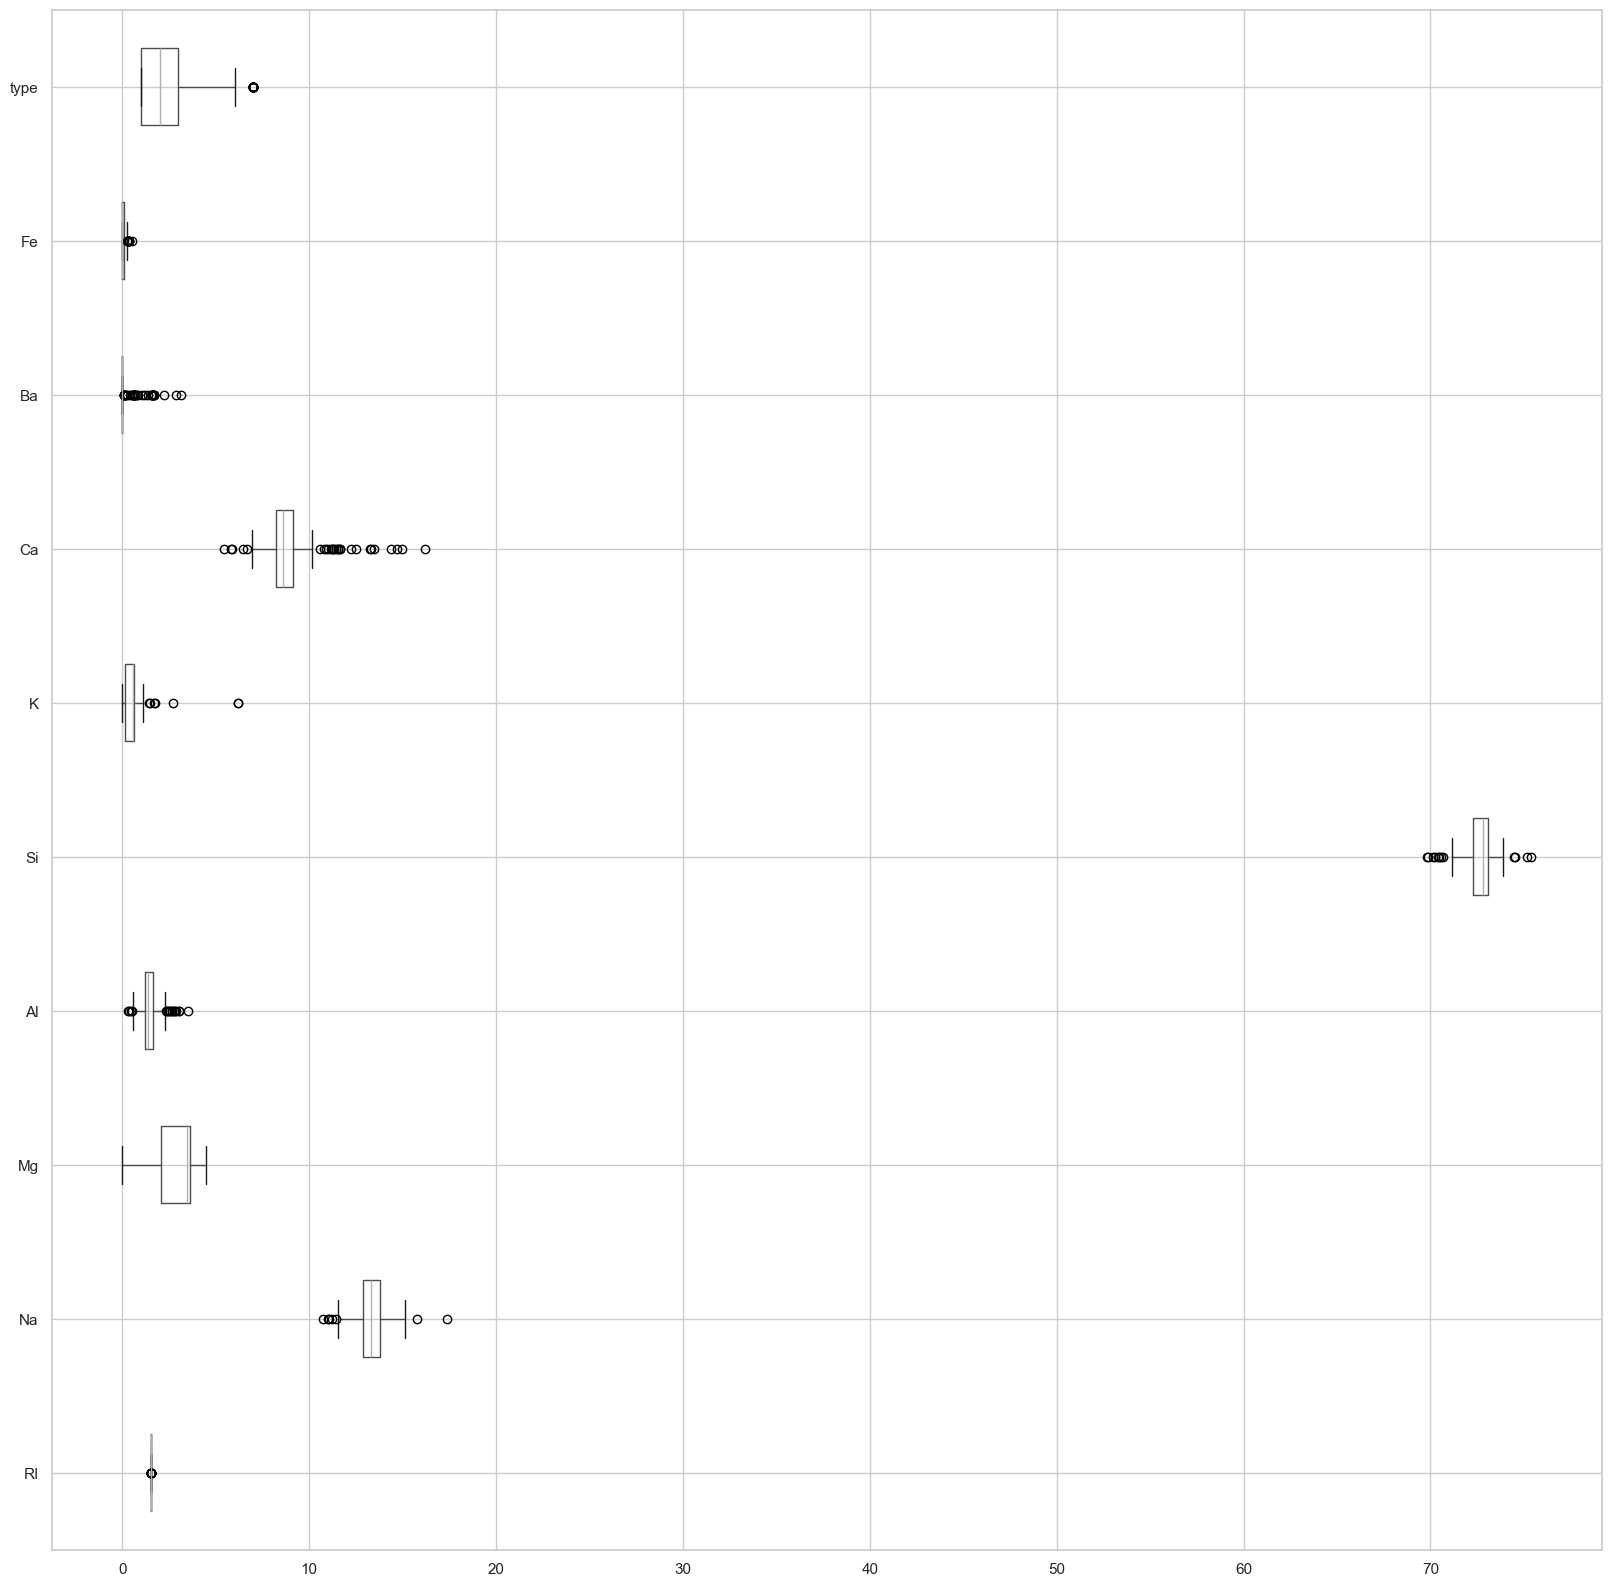

In [313]:
import matplotlib.pyplot as plt

glass.boxplot(vert=False,figsize=(20,20))
plt.show()

Pada boxplot diatas, terlihat bahwa jumlah outlier tidak terlalu banyak. Data juga cenderung normal, sehingga tidak perlu lagi penanganan terhadap outlier.

In [314]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [315]:
outliers = dict(check_outlier(glass).sum())

Outlier pada tiap atribut:
RI      17
Na       7
Mg       0
Al      17
Si      12
K        7
Ca      27
Ba      38
Fe      12
type    29
dtype: int64


Untuk kemudahan implementasi kita berasumsi bahwa *acceptance threshold* untuk outlier yang kita maklumi adalah 17 sehingga kita akan membuang kolom dengan jumlah outlier >= 17

In [316]:
drop_col = [key for key, val in outliers.items() if val >= 17]
drop_col.remove('type')
drop_col

['RI', 'Al', 'Ca', 'Ba']

In [317]:
glass = glass.drop(columns=drop_col)
glass.head()

,Na,Mg,Si,K,Fe,type
0,13.64,4.49,71.78,0.06,0.0,1
1,13.89,3.60,72.73,0.48,0.0,1
2,13.53,3.55,72.99,0.39,0.0,1
3,13.21,3.69,72.61,0.57,0.0,1
4,13.27,3.62,73.08,0.55,0.0,1


In [318]:
import seaborn as sns
sns.set()

In [319]:
cleanData = glass.copy()

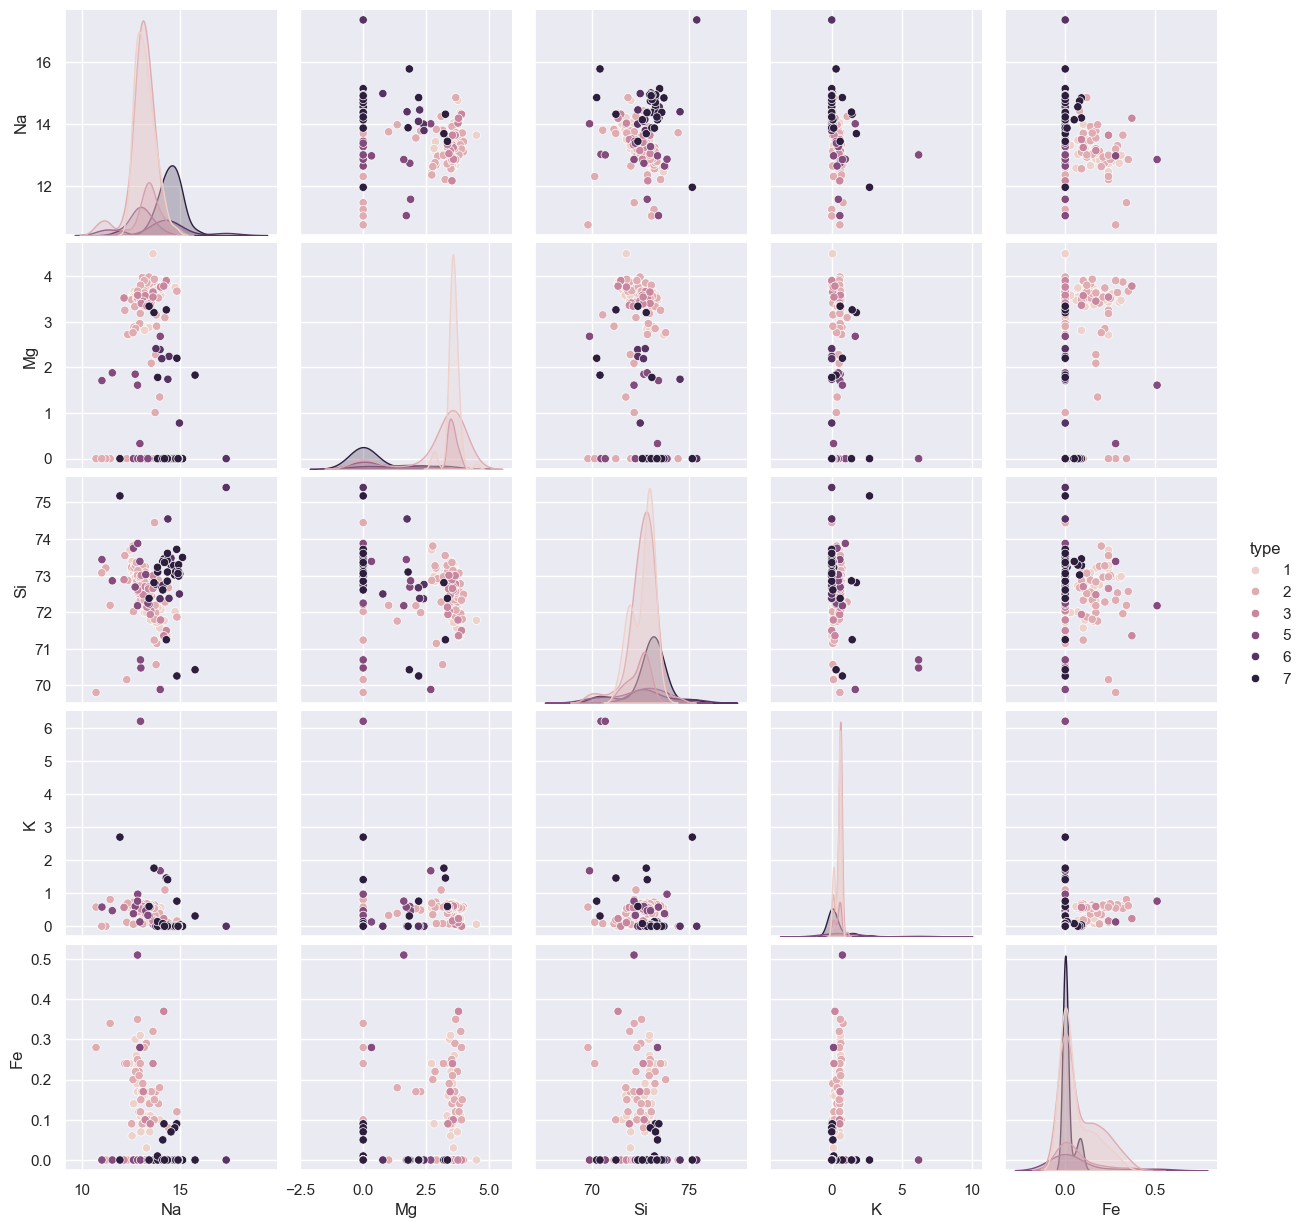

In [320]:
sns.pairplot(cleanData,hue ='type')
plt.show()

Berdasarkan plot diatas, terlihat bahwa distribusi nilai pada semua jenis obat hampir mendekati normal. Walaupun ada beberapa yang terlihat seperti bimodal, masih tetap bisa ditoleransi.

### Menentukan dependent variable dan independent variables

Karena target prediksi kita disini adalah <b>type</b>, maka variable **type** akan menjadi variable dependent dan variable yang lainnya akan menjadi variable independent.

Sebelum menentukan independent variables atau features yang akan kita gunakan pada model, kita akan melakukan feature selection terlebih dahulu untuk memilih variable-variable terbaik. Karena data <b>feature</b> kita bersifat numerik atau kontinuos, dan data target kita kategorik, maka kita akan memilih strategi <b> ANOVA </b> atau analysis of variance dalam melakukan feature selection. Berikut adalah contohnya.

Referensi : <br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [321]:
X_raw = cleanData.drop(["type"],axis=1)
y     = cleanData["type"]

In [322]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Kita akan memilih 3 variable terbaik dari independent variable kita untuk dilatih pada model. Berikut adalah contoh code-nya.

In [323]:
selector = SelectKBest(f_classif, k=3)
X = selector.fit_transform(X_raw, y)

<i> Note </i> : <br>
Perhatikan, pemilihan feature harus dilakukan secara terus menerus atau berulang dengan memperbaiki tahap sebelumnya. Jika teman-teman ingin mendapatkan model terbaik, teman-teman harus terus melakukan tahapan ini hingga teman-teman mendapatkan model yang terbaik.

In [324]:
print("Jumlah feature (sebelum dilakukan feature selection ) :", X_raw.shape[1])
print("Jumlah feature (setelah dilakukan feature selection ) :", X.shape[1])

Jumlah feature (sebelum dilakukan feature selection ) : 5
Jumlah feature (setelah dilakukan feature selection ) : 3


In [325]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['Na', 'Mg', 'K'], dtype=object)

Dari hasil feature selection yang ada kita akan mengambil 4 fitur yaitu `Na`, `Mg`, dan `K`. Selanjutnya, kita akan membagi dataset menjadi testing dan training dengan ukuran yang sama pada proses Naive Bayes. Berikut adalah caranya.

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 123)

### Standarization

Sebelum melakukan KNN, kita perlu standarisasi nilai independent variables kita. Hal ini <b>cukup penting</b> dilakukan dalam KNN, karena range nilai yang berbeda-beda dapat mengganggu perhitungan jarak ketika algoritma dijalankan.

Pada tahapan ini, kita akan memilih menggunakan min max scaler saja, berikut adalah caranya.

In [327]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [328]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### KNN

In [329]:
from sklearn.neighbors import KNeighborsClassifier

# Mengatur jumlah neighbor yang digunakan.
N_NEIGHBORS = 4

# Mengatur jumlah pelatihan pada fold fold yang ada.
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

Teman-teman dapat memilih rumus perhitungan jarak yang ingin digunakan dengan menambahkan parameter `metric` pada saat pembuatan model KNN. By default, jika tidak ditambahkan, nilai parameter tersebut adalah minkowski.

#### KNN dengan Euclidean Distance

In [330]:
KNN_euclidean = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='euclidean')
KNN_euclidean.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [331]:
scores = cross_val_score(KNN_euclidean, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.565060908084164


In [332]:
y_pred = KNN_euclidean.predict(X_test_scaled)
y_pred

array([1, 7, 2, 1, 1, 2, 1, 7, 2, 7, 2, 3, 1, 2, 1, 7, 1, 2, 2, 1, 5, 7,
       1, 3, 2, 3, 2, 6, 1, 2, 2, 5, 1, 7, 2, 3, 1, 2, 1, 1, 2, 1, 1],
      dtype=int64)

In [333]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           1       0.56      0.64      0.60        14
           2       0.71      0.67      0.69        15
           3       0.25      0.33      0.29         3
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         2
           7       0.67      0.67      0.67         6

    accuracy                           0.60        43
   macro avg       0.53      0.50      0.51        43
weighted avg       0.61      0.60      0.60        43



Confusion Matrix



prediction,1,2,3,5,6,7
actual,,,,,,
1,9,2,3,0,0,0
2,5,10,0,0,0,0
3,2,0,1,0,0,0
5,0,1,0,2,0,0
6,0,0,0,0,0,2
7,0,1,0,0,1,4




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.6046511627906976
F1 Macro Average: 0.5070060207991243
F1 Micro Average: 0.6046511627906976
Precision Macro Average: 0.5322420634920635
Precision Micro Average: 0.6046511627906976
Recall Macro Average: 0.496031746031746
Recall Micro Average: 0.6046511627906976



#### KNN Dengan Manhattan Distance

In [334]:
KNN_manhattan = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='manhattan')
KNN_manhattan.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [335]:
scores = cross_val_score(KNN_manhattan, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.6121262458471761


In [336]:
y_pred = KNN_manhattan.predict(X_test_scaled)
y_pred

array([1, 7, 2, 1, 1, 2, 1, 7, 2, 7, 2, 3, 1, 2, 1, 7, 1, 1, 2, 1, 5, 7,
       1, 3, 2, 1, 2, 2, 1, 2, 2, 5, 1, 7, 3, 3, 1, 2, 1, 1, 2, 1, 1],
      dtype=int64)

In [337]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           1       0.56      0.71      0.63        14
           2       0.62      0.53      0.57        15
           3       0.25      0.33      0.29         3
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         2
           7       0.67      0.67      0.67         6

    accuracy                           0.58        43
   macro avg       0.51      0.49      0.49        43
weighted avg       0.58      0.58      0.57        43



Confusion Matrix



prediction,1,2,3,5,7
actual,,,,,
1,10,2,2,0,0
2,6,8,1,0,0
3,2,0,1,0,0
5,0,1,0,2,0
6,0,0,0,0,2
7,0,2,0,0,4




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.5813953488372093
F1 Macro Average: 0.491468253968254
F1 Micro Average: 0.5813953488372093
Precision Macro Average: 0.5146011396011396
Precision Micro Average: 0.5813953488372093
Recall Macro Average: 0.4857142857142857
Recall Micro Average: 0.5813953488372093



#### KNN dengan Jaccard Distance

In [338]:
KNN_jaccard = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='jaccard')
KNN_jaccard.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='jaccard', n_neighbors=4)

In [339]:
scores = cross_val_score(KNN_jaccard, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.3996400885935769


In [340]:
y_pred = KNN_jaccard.predict(X_test_scaled)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [341]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.36      1.00      0.53        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.35        43
   macro avg       0.06      0.17      0.09        43
weighted avg       0.12      0.35      0.18        43



Confusion Matrix



prediction,2,6
actual,,
1,13,1
2,15,0
3,3,0
5,3,0
6,2,0
7,6,0




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.3488372093023256
F1 Macro Average: 0.08771929824561403
F1 Micro Average: 0.3488372093023256
Precision Macro Average: 0.05952380952380953
Precision Micro Average: 0.3488372093023256
Recall Macro Average: 0.16666666666666666
Recall Micro Average: 0.3488372093023256



Berdasarkan hasil evaluasi beberapa model diatas, terlihat pula bahwa model menghasilkan hasil evaluasi yang kurang baik saat menggunakan metric distance Jaccard. Hal tersebut karena Jaccard biasa digunakan untuk menghitung similarity atau dissimilarity di antara fitur-fitur binary/categorical. Oleh karena semua fitur kita sudah dalam bentuk numerik, maka Jaccard kurang baik dalam melakukan perhitungan jarak atribut-atribut tersebut sehingga berdampak pada kinerja model yang dihasilkan menjadi kurang baik pula.

### Hyperparameter Tuning

Seperti yang sudah dikatakan sebelumnya, dalam memilih nilai K yang terbaik kita perlu melakukan cross validation. Kita akan melakukan hal ini dengan hyperparameter tuning menggunakan bantuan grid search cv. Scoring yang akan kita gunakan pada fase tuning adalah accuracy, artinya adalah kita akan mengambil parameter terbaik yang memberikan nilai akurasi terbaik. Berikut adalah contohnya.

In [342]:
# Optimalisasi KNN dengan gridsearch CV
# import Grid Search CV
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
tunned_params = [{'n_neighbors': [1,2,3,4,5,6,7,8],'metric': ['euclidean', 'manhattan', 'jaccard']}]

print("Tuning hyper-parameters model KNN")
print()

clfKNN = GridSearchCV(
    model,
    tunned_params,
    scoring="accuracy",
    cv=kfold,
    verbose = 2
)

clfKNN.fit(X_train_scaled, y_train)

print()
print("Best parameters set found on development set:")
print(clfKNN.best_params_)
print()
print("Detailed classification report:")
y_true, y_pred = y_test, clfKNN.predict(X_test_scaled)
evaluate_classifier_performance(y_pred, y_true)
print()

Tuning hyper-parameters model KNN

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....

prediction,1,2,3,5,7
actual,,,,,
1,13,1,0,0,0
2,8,7,0,0,0
3,1,1,1,0,0
5,0,1,0,2,0
6,0,0,0,0,2
7,0,2,0,0,4




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.627906976744186
F1 Macro Average: 0.534567901234568
F1 Micro Average: 0.627906976744186
Precision Macro Average: 0.6401515151515151
Precision Micro Average: 0.627906976744186
Recall Macro Average: 0.5103174603174603
Recall Micro Average: 0.627906976744186




Berdasarkan hasil diatas, kita peroleh bahwa nilai k yang paling optimal adalah 2 dengan metric distance manhattan.

Berdasarkan hasil diatas, model yang kita peroleh sudah optimal karena nilai akurasi diatas 60%. Nilai F1 Micro dan Accuracy kita juga sudah diatas 60%, hal ini menandakan bahwa model kita memiliki nilai false positive dan false negative yang rendah.  

# Latihan Soal

## A. Pertanyaan Teoritis (Soal Pertama) [30]

### A. Soal Teoritis Naive Bayes [10]

Teorema Bayes adalah rumus dasar dalam teori probabilitas yang digunakan untuk menghitung probabilitas suatu peristiwa berdasarkan pengetahuan sebelumnya tentang peristiwa tersebut.

* Bagaimana Teorema Bayes digunakan dalam algoritma Naive Bayes?
* Apa asumsi yang digunakan dalam penggunaan algoritma Naive Bayes?

> <b><i>Jawaban</i></b> : <br>
Teorema bayes berperan untuk mengestimasi probabilitas suatu data point masuk ke kelas tertentu, dalam konteks klasifikasi, berdasarkan fitur-fitur data point tersebut. Pada algoritma naive bayes, ide yang dimiliki adalah menggunakan teorema bayes untuk memaksimalkan probabilitas bersyarat dari kelas tertentu berdasarkan fitur-fitur yang data point terkait dan kemudian dapat digunakan untuk mengklasifikasikan data point ke dalam kelas yang memiliki probabilitas yang maksimal.
>
> Asumsi yang digunakan dalam penggunaan algoritma Naive Bayes adalah semua fitur-fiturnya bersifat independen dan memiliki bobot sama penting.

> <b><i>Referensi</i></b> : <br>
>- https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

### B. Soal Teoritis KNN [10]

Terdapat satu fenomena yang dialami oleh KNN, yaitu Curse of Dimentionality. Curse of Dimentionality adalah suatu fenomena di mana semakin meningkatnya jumlah fitur (dimensi) pada data dapat menyebabkan semakin menurunnya kinerja serta performa dari model yang dihasilkan. Menurut teman-teman, mengapa hal tersebut bisa terjadi? Kemudian jelaskan hal-hal apa saja yang dapat dilakukan untuk mengatasi masalah tersebut?

> <b><i>Jawaban</i></b> : <br>
Curse of dimentionality pada KNN terjadi ketika pada dimensi yang tinggi jarak antara point tetangga terdekat dan point tetangga terjauh dengan query point yang diinginkan menjadi seragam. Oleh karena itu, KNN kesulitan untuk menentukan point mana yang akan menjadi kandidat tetangga terdekat. Cara-cara yang dapat dilakukan untuk mengatasi masalah tersebut adalah mereduksi dimensi dengan menggunakan beberapa teknik seperti Principal Component Analysis (PCA) atau t-sne sehingga tidak ada informasi penting yang ikut hilang, memilih fitur-fitur yang penting-penting saja sehingga dimensi berkurang, meningkatkan jumlah data untuk mengimbangi dimensi yang tinggi.


> <b><i>Referensi</i></b> : <br>
>- https://ieeexplore.ieee.org/document/6065061
>- https://towardsdatascience.com/k-nearest-neighbors-and-the-curse-of-dimensionality-e39d10a6105d#:~:text=To%20overcome%20this%20challenge%2C%20you,algorithm%20to%20provide%20valuable%20predictions
>- https://dataloop.ai/blog/the-curse-of-dimensionality-dimension-reduction/

### C. Soal Teoritis Preprocessing [10]

Pada tahap persiapan data *hands on Naive Bayes* sebelumnya, Anda dapat melihat bahwa terdapat suatu teknik encoding yang dapat kita gunakan yaitu label encoding. Jawablah beberapa pertanyaan dibawah ini:

* Jelaskan apa itu label encoding beserta 3 poin kelebihan dan 3 poin kekurangannya.

> <b><i>Jawaban</i></b> : <br>
>Kelebihan:
>- Menghemat memori dengan mengubah data kategorikal menjadi data numerik  
>- Membuat data kategorikal menjadi mungkin untuk digunakan dalam algoritma machine learning yang membutuhkan data numerik
>- Cepat dalam eksekusinya dan mudah untuk diimplementasikan
>Kekurangan:
>- Sulit untuk mengembalikan data hasil label encoding ke data awal tanpa adanya referensi awal ketika data kategorikal diubah ke data numerik
>- Memungkinkan terjadinya pembiasan ordinal dimana data numerik yang merupakan hasil dari label encoding diartikan sebagai data ordinal
>- Model yang dihasilkan dapat berkurang keakuratannya karena adanya kemungkinan terjadinya pembiasan ordinal

> <b><i>Referensi</i></b> : <br>
>- https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

## B. Latihan Implementasi [70]

Kita akan mencoba membuat model klasifikasi untuk kasus loan_approval, berikut adalah penjelasan tiap atribut yang digunakan pada dataset ini. Dataset diambil dari Kaggle dengan modifikasi.

Attribute Information

* `loan_id` : Unique identifier of loan appliance
* `no_of_dependents` : Number of dependents
* `education` : Education level (Graduate or Not Graduate)
* `self_employed` : Self-employed status (Yes or No)
* `income_annum` : Annual income
* `loan_amount` : Loan amount
* `loan_term` : Loan term (in months)
* `cibil_score` : CIBIL score
* `residential_assets_value` : Value of residential assets
* `commercial_assets_value` : Value of commercial assets
* `luxury_assets_value` : Value of luxury assets
* `bank_asset_value` : Value of assets held in the bank
* `loan_status` : Loan status (Approved or Rejected) [**Target**]


In [343]:
loan = pd.read_csv('loan_approval_dataset.csv')
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [344]:
print("Jumlah baris : ", loan.shape[0])
print("Jumlah kolom : ", loan.shape[1])

Jumlah baris :  4269
Jumlah kolom :  13


In [345]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### <b> Deskripsi Soal </b>

Target klasifikasi kita adalah atribut **loan_status**. Atribut tersebut terdiri atas 2 nilai unik, **Approved dan Rejected**, yang menyatakan apakah pinjaman seseorang diterima atau tidak.

Berikut adalah alur atau tahapan yang harus teman-teman kerjakan. Semangat!

### 1. Preprocessing [10]

Lakukan preprocessing, dengan minimum spesifikasi sebagai berikut : <br>

* `Cek keberadaan missing values` jika ditemukan missing values lakukan penanganan yang tepat sesuai dengan asumsi Anda


* `Cek keberadaan nilai duplikat` jika ditemukan lakukan penanganan yang tepat sesuai dengan asumsi Anda


* `Cek keberadaan outlier` Anda bebas memilih penanganan outlier apa yang Anda gunakan, bisa dengan membuangnya atau mungkin membiarkannya saja dengan asumsi data normal. Dalam mencari outlier juga, Anda bebas menggunakan cara apapun, dengan tetap memberikan asumsi yang logis.


Anda boleh mengembangkan tahapan ini, namun kriteria minimum yang wajib Anda lakukan adalah seperti diatas. Silahkan bereksplorasi :D

**Catatan**: *Anda dapat menambahkan blok code maupun markdown sesuai dengan kebutuhan Anda.*

**Cek keberadaaan missing values**

In [346]:
check_null(loan)

Tidak ditemukan missing value pada dataset


**Cek keberadaan nilai duplikat**

In [347]:
loan.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4264    False
4265    False
4266    False
4267    False
4268    False
Length: 4269, dtype: bool

In [348]:
print("Jumlah duplikasi data pada dataset loan: " + str(loan.duplicated().sum()))

Jumlah duplikasi data pada dataset loan: 0


**Cek keberadaan outlier**

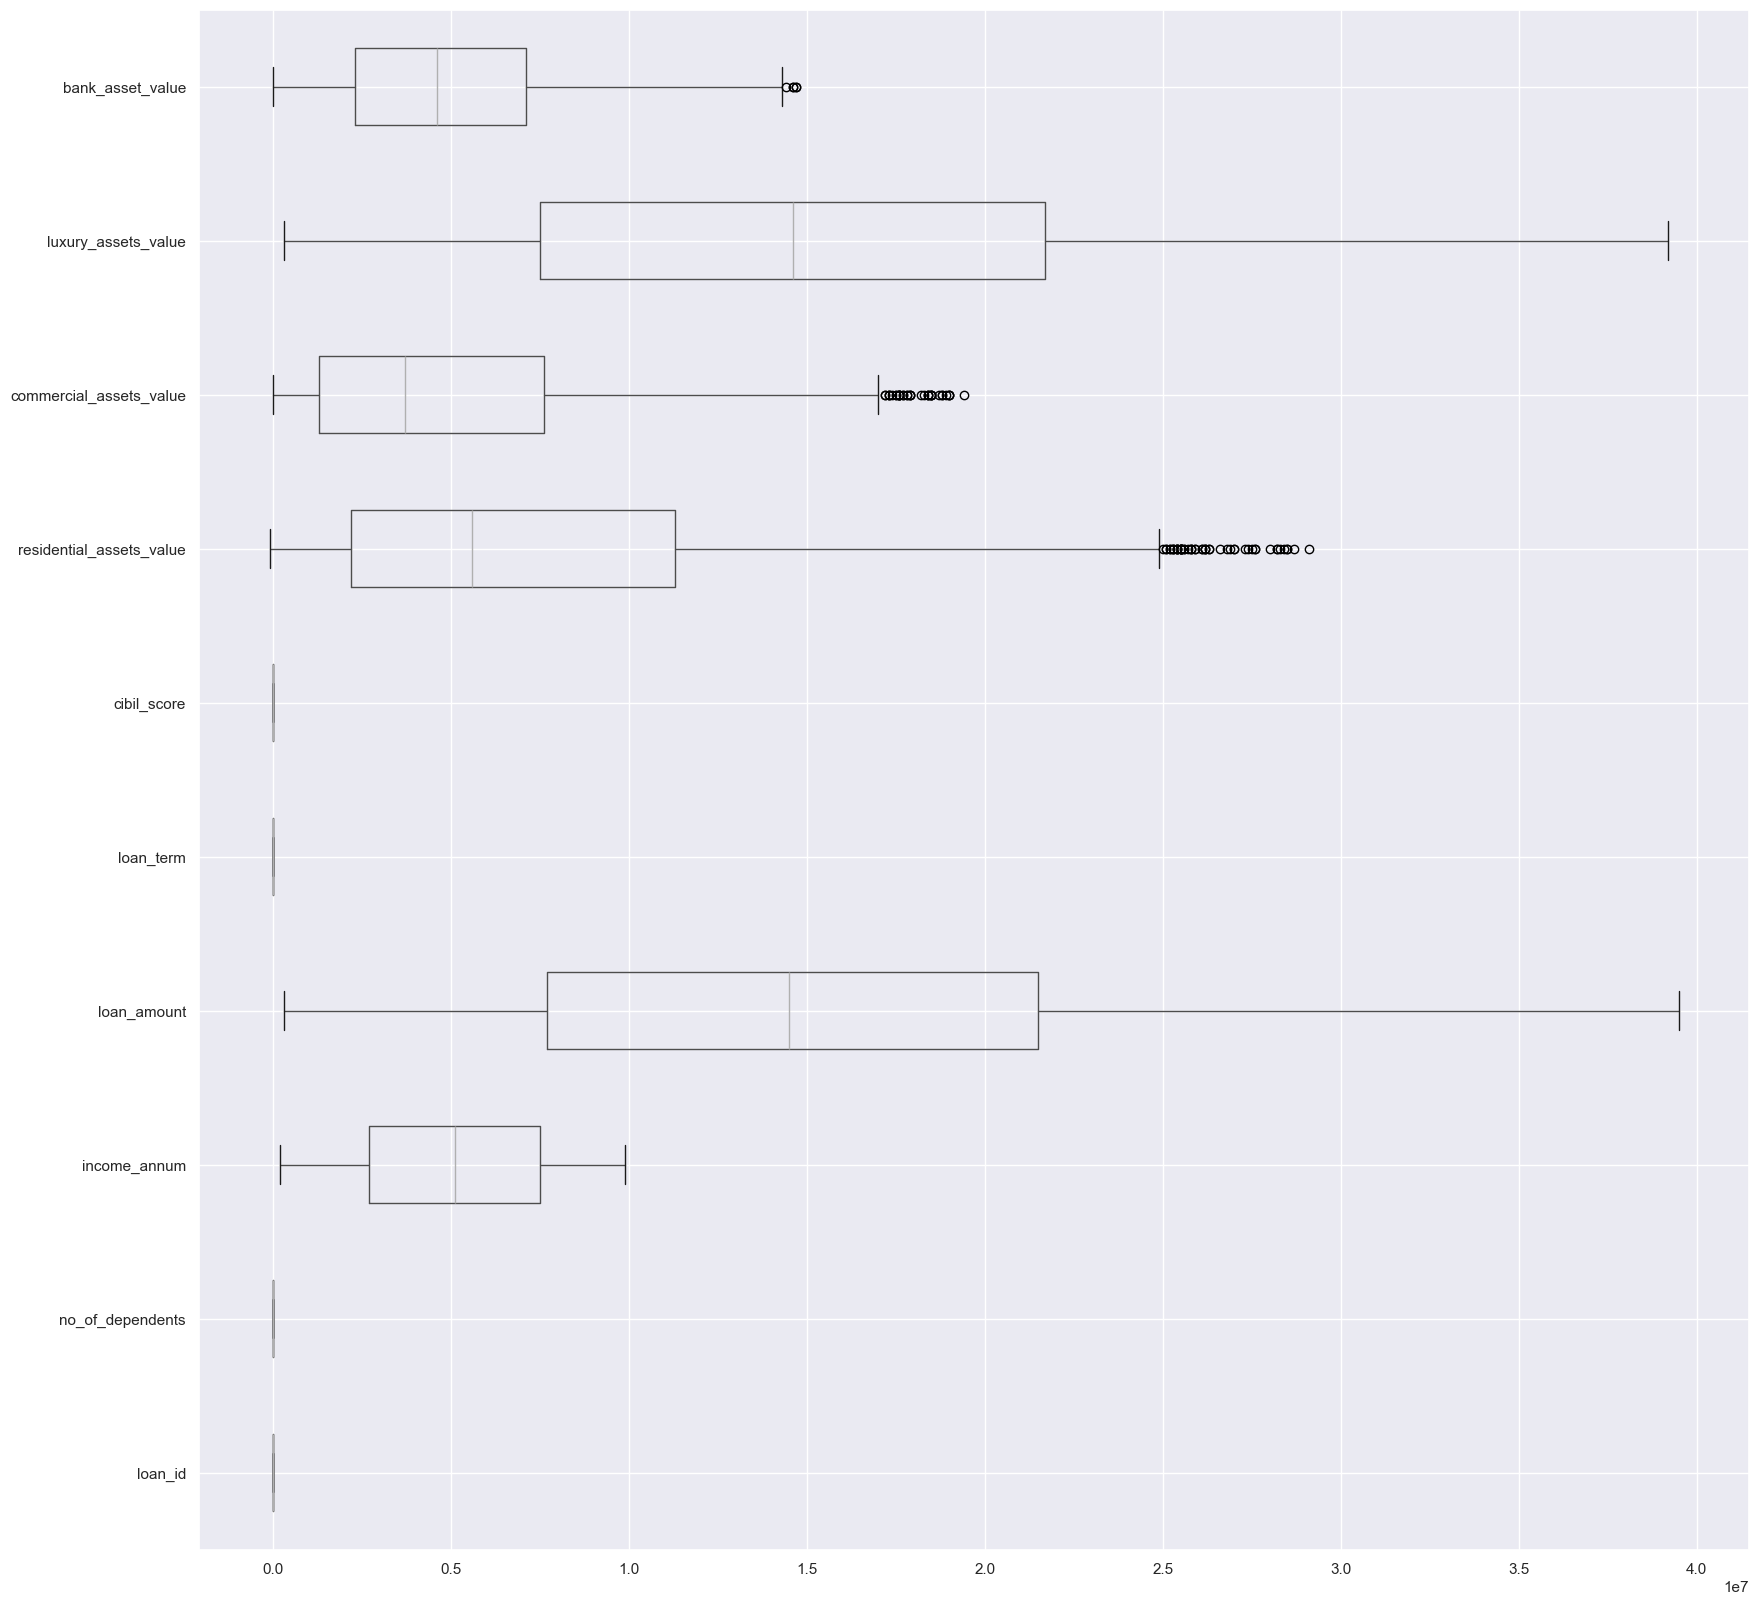

In [349]:
loan.boxplot(vert=False, figsize=(20,20))
plt.show()

In [350]:
numDataLoan = loan.drop(["loan_id", "education", "self_employed", "loan_status"], axis=1)
loanOutliers = dict(check_outlier(numDataLoan).sum())

Outlier pada tiap atribut:
no_of_dependents             0
income_annum                 0
loan_amount                  0
loan_term                    0
cibil_score                  0
residential_assets_value    52
commercial_assets_value     37
luxury_assets_value          0
bank_asset_value             5
dtype: int64


Untuk menangani outliers di atas maka kita akan melakukan drop row tersebut

In [351]:
def delete_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    no_outliers_mask = ((df >= lower_limit) & (df <= upper_limit)).all(axis=1)
    return df[no_outliers_mask]
    

In [352]:
numDataLoan = delete_outlier(numDataLoan)

### 2. Persiapan Training [15]

Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training. Berikut adalah hal-hal minimum yang harus Anda lakukan :
* `Lakukan encoding terhadap fitur-fitur yang masih dalam bentuk kategorikal`. Anda dapat melakukan encoding dengan menggunakan library encoder apapun yang menurut Anda terbaik.

* `memilih dependent dan juga independent variables` Anda diminta untuk memilih dependent dan independent variables yang terbaik menurut penemuan Anda. Kalian bisa melakukan feature selection dengan ukuran terbaik menurut Anda. Kalin juga bisa menggunakan teknik lain, seperti mengecek korelasi atau melakukan literasi terkait pengajuan pinjaman yang biasa dilakukan di bank. Jangan lupa untuk menjelaskan asumsi yang Anda ambil. ( <i> Hint </i> : Silakan eksplorasi pengambilan fitur dari jumlah kecil ke jumlah besar)


* `membagi dataset menjadi training dan testing` bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing. Pastikan juga pembagian training dan testing <b>merata</b> berdasarkan target atribut (<i>Hint</i> : perhatikan parameter yang digunakan pada train split test yang digunakan sebelumnya).


* `lakukan standarisasi` Anda bebas memilih standarisasi apa yang menurut Anda merupakan strategi terbaik. Bagian terpenting adalah, berikan alasan kenapa Anda menggunakan strategi tersebut. (<i>Hint</i> : perhatikan method yang digunakan saat standarisasi, jangan sampai keliru ketika melakukan standarisasi training dan testing).

**Catatan**: *Anda dapat menambahkan blok code maupun markdown sesuai dengan kebutuhan Anda.*

**Melakukan label encoding**

In [353]:
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [354]:
le = LabelEncoder()
columns_to_encode = ["education", "self_employed", "loan_status"]
for col in columns_to_encode:
    loan[col] = le.fit_transform(loan[col])
    
loan

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


**Melakukan feature selection**

In [355]:
# Menghapus kolom Id
loan = loan.drop(["loan_id"], axis=1)

In [356]:
iseng = dict(check_outlier(loan).sum())


Outlier pada tiap atribut:
no_of_dependents             0
education                    0
self_employed                0
income_annum                 0
loan_amount                  0
loan_term                    0
cibil_score                  0
residential_assets_value    52
commercial_assets_value     37
luxury_assets_value          0
bank_asset_value             5
loan_status                  0
dtype: int64


**Menghapus outliers pada data yang sudah dilakukan label encoding**

In [357]:
loan = delete_outlier(loan)

**Memisahkan atribut independen dan dependen**

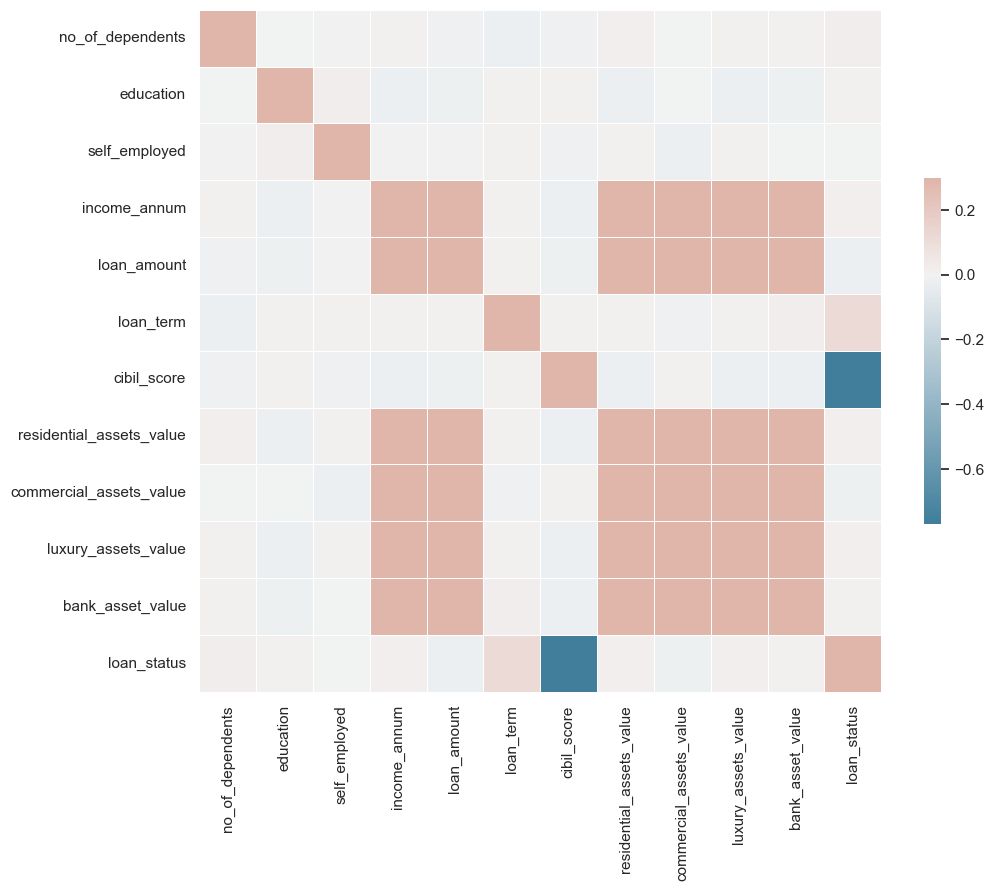

In [358]:
# Calculate the correlation matrix
corr = loan.corr()

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()





In [359]:
#Variabel independen
loan_x = loan.drop(["loan_status"], axis=1)
loan_x.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
5,0,0,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000


In [360]:
#Variabel depeden
loan_y = loan["loan_status"]
loan_y.head()

1    1
2    1
3    1
4    1
5    1
Name: loan_status, dtype: int32

**Membagi dataset menjadi data training dan testing**

In [361]:
x_loan_train, x_loan_test, y_loan_train, y_loan_test = train_test_split(loan_x, loan_y, test_size = 0.2, stratify=loan_y,random_state = 123)

**Melakukan standarisasi menggunakan min max scaler**

In [362]:
x_loan_train_scaled = scaler.fit_transform(x_loan_train)
x_loan_test_scaled = scaler.transform(x_loan_test)

### 3. Implementasi Naive Bayes [25]

Pada tahapan ini, Anda diminta untuk membangun model naive bayes dengan <b> syarat </b> memilih model naive bayes yang sesuai (**berikan alasan yang sesuai**).

***Tips***: <br>Ingat bahwa model kita ingin memprediksi apakah pinjaman dapat diterima atau tidak. Oleh karena itu, pilihlah model dengan hasil evaluasi yang meminimalkan jumlah False Negative (serta False Positive). Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model Anda dengan metrik evaluasi tersebut.

<b><i> Hint </i></b> : <br>
Liat distribusi nilai dari setiap feature yang telah Anda pilih pada tahap sebelumnya, apakah sifat distribusinya? Melalui analisis ini, Anda bisa menentukan model apa yang optimal.


**Catatan:**
*Anda diperbolehkan menggunakan atau menambahkan cell dengan tipe markdown untuk memberikan komentar atau catatan.*

**Melihat distribusi setiap fitur**

In [363]:
x_loan_train.shape

(3342, 11)

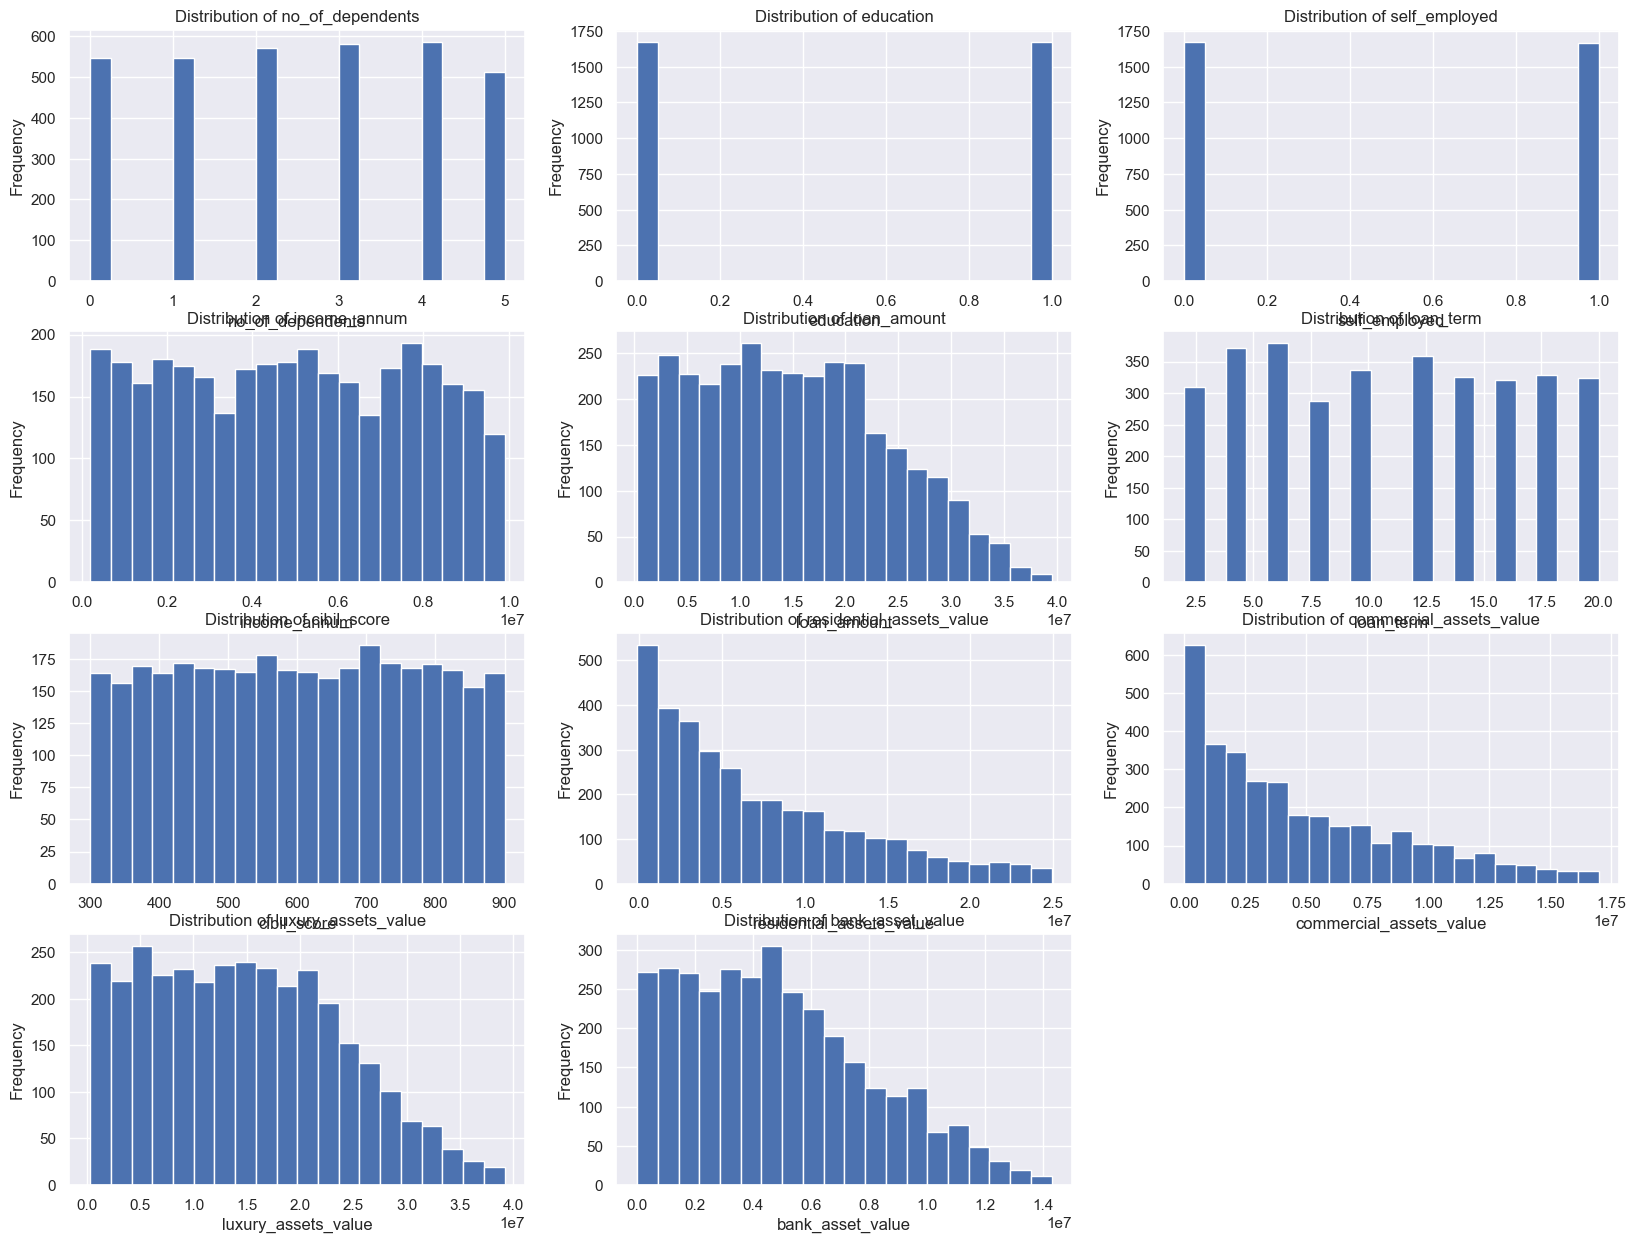

In [364]:
counter = 1
plt.figure(figsize=(20, 15))
for column in x_loan_train.columns: # Replace with appropriate column access if needed
    plt.subplot(4,3,counter) 
    plt.hist(x_loan_train[column], bins=20)  # You can adjust the number of bins
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    counter += 1
plt.show()

**Menyeleksi beberapa fitur**

In [365]:
from sklearn.feature_selection import SelectKBest, chi2

x_loan_train_scaled.shape

(3342, 11)

In [366]:
selected_x_loan_train = SelectKBest(chi2, k=5).fit_transform(x_loan_train_scaled, y_loan_train)
selected_x_loan_train.shape

(3342, 5)

In [367]:
selected_x_loan_train

array([[0.6       , 0.87628866, 0.11111111, 0.02      , 0.364     ],
       [0.2       , 0.17525773, 0.22222222, 0.43333333, 0.044     ],
       [1.        , 0.31958763, 0.88888889, 0.66166667, 0.356     ],
       ...,
       [0.8       , 0.02061856, 0.44444444, 0.245     , 0.004     ],
       [0.2       , 0.75257732, 0.44444444, 0.615     , 0.076     ],
       [0.2       , 0.11340206, 1.        , 0.205     , 0.04      ]])

In [368]:
selector = SelectKBest(chi2, k=5)
selected_x_loan_test = selector.fit_transform(x_loan_test_scaled, y_loan_test)

selected_features = selector.get_support(indices=True)

feature_names = list(x_loan_test.columns[selected_features])

print("Selected features indices:", selected_features)
print("Selected features names:", feature_names)

Selected features indices: [2 4 5 6 8]
Selected features names: ['self_employed', 'loan_amount', 'loan_term', 'cibil_score', 'commercial_assets_value']


**Menerapkan model gaussian naive bayes untuk setiap fitur**

In [369]:
# Melakukan pembagian data sesuai dengan jenis distribusi datanya yang terlihat di atas
# continuous_cols = ["income_annum", "loan_amount", "cibil_score", "residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value"]
# categorical_cols = ["no_of_dependents", "loan_term", "education", "self_employed"] 

x_loan_train_continuous = selected_x_loan_train
# x_loan_train_categorical = x_loan_train[categorical_cols]

x_loan_test_continuous = selected_x_loan_test
# x_loan_test_categorical = x_loan_test[categorical_cols]


In [370]:
loan_model_gnb = GaussianNB() # For continues
loan_model_gnb.fit(x_loan_train_continuous, y_loan_train)

GaussianNB()

In [371]:
loan_continuous_posteriors = loan_model_gnb.predict_proba(x_loan_test_continuous)
# loan_categorical_posteriors = loan_model_categorical.predict_proba(x_loan_test_categorical)

# loan_combined_prob = loan_continuous_posteriors * loan_categorical_posteriors

# loan_combined_prob /= loan_combined_prob.sum(axis=1, keepdims=True)

loan_final_prediction = np.argmax(loan_continuous_posteriors, axis=1)
loan_final_prediction


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [372]:
np.array(y_loan_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [373]:
evaluate_classifier_performance(loan_final_prediction,y_loan_test)


Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       521
           1       0.91      0.93      0.92       315

    accuracy                           0.94       836
   macro avg       0.93      0.93      0.93       836
weighted avg       0.94      0.94      0.94       836



Confusion Matrix



prediction,0,1
actual,,
0,491,30
1,23,292




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.9366028708133971
F1 Macro Average: 0.9327948793787304
F1 Micro Average: 0.9366028708133971
Precision Macro Average: 0.9310426082122919
Precision Micro Average: 0.9366028708133971
Recall Macro Average: 0.9347012765438869
Recall Micro Average: 0.9366028708133971



### 4. Implementasi KNN [20]

Setelah mencoba model naive bayes, Anda diminta juga untuk mencoba membangun model klasifikasi dengan algoritma KNN.

Berikut adalah langkah-langkah umum yang dapat Anda ikuti:
* Pilih nilai K yang terbaik menurut Anda dan lakukan analisis berdasarkan temukan Anda. Mulai dengan mengambil nilai K secara random terlebih dahulu pada percobaan pertama, lalu kemudian perbaiki dengan parameter tuning. Anda juga boleh mencoba untuk tuning parameter yang lain (tetapi tidak diwajibkan).
* Lakukan cross validation serta tampilkan rata-rata hasil evaluasi cross validationnya. Anda dapat menggunakan algoritma cross_validation yang sesuai menurut Anda sekalian. Beberapa yang dapat digunakan misalnya `KFold` atau `StratifiedKFold`, Anda dapat melakukan eksplorasi lebih lanjut untuk mengetahui perbedaan keduanya.
* Cantumkan hasil evaluasi cross validationnya. Setelah itu, Berikan pula hasil evaluasi model dan berikan analisis Anda. Jika model kurang optimal, berikan saran perbaikan yang sesuai. Pilih juga parameter `metric` distance yang sesuai menurut Anda sesuai dengan karakteristik data yang diberikan.

**Hint**: Ingat bahwa model kita ingin memprediksi apakah pinjaman yang diajukan diterima atau tidak. Oleh karena itu, usahakan pilih model dengan hasil evaluasi yang meminimalkan jumlah False Negative (serta False Positive). Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model Anda dengan metrik evaluasi tersebut.

**Catatan:**
*Anda diperbolehkan menggunakan atau menambahkan cell dengan tipe markdown untuk memberikan komentar atau catatan.*

**Memilih jumlah neighboor**

In [374]:
LOAN_N_NEIGHBORS = 5

loan_kfold = KFold(n_splits=5, shuffle=True, random_state=40)

**KNN dengan Euclidean Distance**

In [375]:
loan_KNN_euclidean = KNeighborsClassifier(n_neighbors=LOAN_N_NEIGHBORS, metric='euclidean')
loan_KNN_euclidean.fit(x_loan_train_scaled, y_loan_train)

KNeighborsClassifier(metric='euclidean')

In [376]:
cross_eval = cross_val_score(loan_KNN_euclidean, x_loan_train_scaled, y_loan_train, scoring='accuracy', cv=loan_kfold)
print(f'Hasil Evaluasi cross validation: {cross_eval.mean()}')

Hasil Evaluasi cross validation: 0.8857021383242485


In [377]:
loan_y_pred = loan_KNN_euclidean.predict(x_loan_test_scaled)
loan_y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [378]:
evaluate_classifier_performance(loan_y_pred, y_loan_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       521
           1       0.89      0.90      0.89       315

    accuracy                           0.92       836
   macro avg       0.91      0.91      0.91       836
weighted avg       0.92      0.92      0.92       836



Confusion Matrix



prediction,0,1
actual,,
0,486,35
1,33,282




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.9186602870813397
F1 Macro Average: 0.913510223953262
F1 Micro Average: 0.9186602870813397
Precision Macro Average: 0.9130030451669371
Precision Micro Average: 0.9186602870813397
Recall Macro Average: 0.9140297961795083
Recall Micro Average: 0.9186602870813397



In [379]:
# Optimalisasi KNN dengan gridsearch CV
# import Grid Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

loan_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)


loan_model = KNeighborsClassifier()
tunned_params = [{'n_neighbors': [1, 3, 5, 7, 9, 11],'metric': ['euclidean', 'manhattan', 'jaccard']}]

print("Tuning hyper-parameters model KNN")
print()

loan_clfKNN = GridSearchCV(
    loan_model,
    tunned_params,
    scoring="accuracy",
    cv=loan_skf,
    verbose = 2
)

loan_clfKNN.fit(x_loan_train_scaled, y_loan_train)

print()
print("Best parameters set found on development set:")
print(loan_clfKNN.best_params_)
print()
print("Detailed classification report:")
loan_y_tune_true, loan_y_tune_pred = y_loan_test, loan_clfKNN.predict(x_loan_test_scaled)
evaluate_classifier_performance(loan_y_tune_pred, loan_y_tune_true)
print()

Tuning hyper-parameters model KNN

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END ....

prediction,0,1
actual,,
0,488,33
1,34,281




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.9198564593301436
F1 Macro Average: 0.9146219706819785
F1 Micro Average: 0.9198564593301436
Precision Macro Average: 0.914885179490934
Precision Micro Average: 0.9198564593301436
Recall Macro Average: 0.9143618803887519
Recall Micro Average: 0.9198564593301436




Dari hasil analisis evaluasi performa yang dapat dilihat di atas model yang dihasilkan sudah cukup baik dengan akurasi 0.9198.

## BONUS ROUND: Kaggle Competition!

Dalam rangka menerapkan pemahaman kalian pada materi Naive Bayes dan KNN dan sebagai sarana untuk **mendapatkan nilai tambahan**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 5 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Naive Bayes dan KNN](https://www.kaggle.com/t/35a456050eff4d5883776bab3a71cc79)

**Nilai Bonus**

Penentuan peserta yang mendapatkan nilai bonus akan ditentukan sesuai dengan peringkat dari masing-masing peserta di leaderboard, semakin tinggi peringkat kalian, semakin besar nilai bonus yang akan kalian dapatkan.

# ----Selesai----

#### Kaggle Competition

import dataset

In [380]:
edu_train = pd.read_csv('edu_sys_review_train.csv')
edu_test = pd.read_csv('edu_sys_review_test.csv')


In [381]:
edu_train.head()

,Id,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,satisfaction_level
0,645,Male,Rural,Post Graduate,18,8,Laptop,Middle Class,10,2,Yes,Yes,8,7,2,Yes,No,yes,81-90,1,2,Practical,4,Bad
1,92,Female,Rural,Under Graduate,18,6,Mobile,Middle Class,5,2,No,Yes,5,6,2,Yes,No,No,71-80,5,5,Theory,10,Good
2,1020,Female,Rural,Under Graduate,20,3,Mobile,Middle Class,6,4,No,Yes,2,7,2,No,Yes,No,81-90,4,3,Practical,7,Good
3,82,Male,Rural,Under Graduate,20,8,Laptop,Middle Class,7,5,No,No,6,7,2,No,Yes,No,71-80,4,4,Theory,7,Average
4,74,Female,Urban,Post Graduate,22,9,Mobile,Middle Class,6,3,Yes,Yes,5,7,2,No,No,No,71-80,4,3,Practical,7,Good


In [382]:
print("Jumlah baris : ", edu_train.shape[0])
print("Jumlah kolom : ", edu_train.shape[1])

Jumlah baris :  826
Jumlah kolom :  24


In [383]:
edu_test.head()

,Id,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online
0,0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,Yes,3,6,1,No,No,No,91-100,1,1,Practical,6
1,2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,Yes,6,7,1,No,Yes,No,71-80,1,1,Both,6
2,6,Male,Urban,Under Graduate,19,5,Laptop,Middle Class,5,5,No,No,2,6,3,Yes,Yes,yes,81-90,4,3,Both,6
3,7,Male,Urban,Under Graduate,17,4,Laptop,Middle Class,4,4,Yes,Yes,4,8,6,No,Yes,No,61-70,3,3,Practical,6
4,10,Female,Urban,Under Graduate,18,4,Desktop,Middle Class,3,5,No,No,5,6,3,Yes,Yes,No,81-90,2,1,Practical,9


In [384]:
edu_test["Economic status"].value_counts()

Economic status
Middle Class    192
Poor             10
Rich              5
Name: count, dtype: int64

In [385]:
print("Jumlah baris : ", edu_test.shape[0])
print("Jumlah kolom : ", edu_test.shape[1])

Jumlah baris :  207
Jumlah kolom :  23


In [386]:
edu_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 24 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Id                                                             826 non-null    int64 
 1   Gender                                                         826 non-null    object
 2   Home Location                                                  826 non-null    object
 3   Level of Education                                             826 non-null    object
 4   Age(Years)                                                     826 non-null    int64 
 5   Number of Subjects                                             826 non-null    int64 
 6   Device type used to attend classes                             826 non-null    object
 7   Economic status                                                826 non-

In [387]:
edu_train.describe()

,Id,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online
count,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,521.075061,19.785714,7.019370,4.441889,3.575061,4.318402,6.950363,2.644068,2.922518,2.825666,6.681598
std,296.477239,3.199445,2.757621,1.240582,1.025639,2.165084,1.305914,1.888837,1.125485,1.182138,1.950061
min,1.000000,9.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,268.250000,18.000000,6.000000,4.000000,3.000000,3.000000,6.000000,1.000000,2.000000,2.000000,6.000000
50%,524.500000,19.000000,7.000000,4.000000,4.000000,4.000000,7.000000,2.000000,3.000000,3.000000,7.000000
75%,776.750000,20.000000,8.000000,5.000000,4.000000,6.000000,8.000000,3.000000,4.000000,4.000000,8.000000
max,1032.000000,40.000000,20.000000,10.000000,5.000000,10.000000,10.000000,10.000000,5.000000,5.000000,10.000000


In [388]:
edu_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Id                                                             207 non-null    int64 
 1   Gender                                                         207 non-null    object
 2   Home Location                                                  207 non-null    object
 3   Level of Education                                             207 non-null    object
 4   Age(Years)                                                     207 non-null    int64 
 5   Number of Subjects                                             207 non-null    int64 
 6   Device type used to attend classes                             207 non-null    object
 7   Economic status                                                207 non-

In [389]:
edu_train.describe()

,Id,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online
count,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,521.075061,19.785714,7.019370,4.441889,3.575061,4.318402,6.950363,2.644068,2.922518,2.825666,6.681598
std,296.477239,3.199445,2.757621,1.240582,1.025639,2.165084,1.305914,1.888837,1.125485,1.182138,1.950061
min,1.000000,9.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,268.250000,18.000000,6.000000,4.000000,3.000000,3.000000,6.000000,1.000000,2.000000,2.000000,6.000000
50%,524.500000,19.000000,7.000000,4.000000,4.000000,4.000000,7.000000,2.000000,3.000000,3.000000,7.000000
75%,776.750000,20.000000,8.000000,5.000000,4.000000,6.000000,8.000000,3.000000,4.000000,4.000000,8.000000
max,1032.000000,40.000000,20.000000,10.000000,5.000000,10.000000,10.000000,10.000000,5.000000,5.000000,10.000000


**Preprocessing**

In [390]:
# Hapus kolom Id
edu_train = edu_train.drop("Id", axis=1)
clean_edu_test = edu_test.drop("Id", axis=1)

In [391]:
check_null(edu_train)

Tidak ditemukan missing value pada dataset


In [392]:
edu_train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
821    False
822    False
823    False
824    False
825    False
Length: 826, dtype: bool

In [393]:
print("Jumlah duplikasi data pada dataset loan: " + str(edu_train.duplicated().sum()))

Jumlah duplikasi data pada dataset loan: 0


In [394]:
pd.set_option('display.max_columns', None)
edu_train.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,satisfaction_level
0,Male,Rural,Post Graduate,18,8,Laptop,Middle Class,10,2,Yes,Yes,8,7,2,Yes,No,yes,81-90,1,2,Practical,4,Bad
1,Female,Rural,Under Graduate,18,6,Mobile,Middle Class,5,2,No,Yes,5,6,2,Yes,No,No,71-80,5,5,Theory,10,Good
2,Female,Rural,Under Graduate,20,3,Mobile,Middle Class,6,4,No,Yes,2,7,2,No,Yes,No,81-90,4,3,Practical,7,Good
3,Male,Rural,Under Graduate,20,8,Laptop,Middle Class,7,5,No,No,6,7,2,No,Yes,No,71-80,4,4,Theory,7,Average
4,Female,Urban,Post Graduate,22,9,Mobile,Middle Class,6,3,Yes,Yes,5,7,2,No,No,No,71-80,4,3,Practical,7,Good


In [395]:
edu_train["Engaged in group studies?"].value_counts()


Engaged in group studies?
No     491
yes    335
Name: count, dtype: int64

In [396]:
pd.crosstab(edu_train["Interested in?"], edu_train["satisfaction_level"])

satisfaction_level,Average,Bad,Good
Interested in?,,,
Both,124,76,60
Practical,187,100,73
Theory,109,28,69


In [397]:
edu_train.columns

Index(['Gender', 'Home Location', 'Level of Education', 'Age(Years)',
       'Number of Subjects', 'Device type used to attend classes',
       'Economic status', 'Family size', 'Internet facility in your locality',
       'Are you involved in any sports?', 'Do elderly people monitor you?',
       'Study time (Hours)', 'Sleep time (Hours)',
       'Time spent on social media (Hours)', 'Interested in Gaming?',
       'Have separate room for studying?', 'Engaged in group studies?',
       'Average marks scored before pandemic in traditional classroom',
       'Your interaction in online mode',
       'Clearing doubts with faculties in online mode', 'Interested in?',
       'Performance in online', 'satisfaction_level'],
      dtype='object')

In [398]:
def convert_range_to_average(range_str):
    start, end = map(int, range_str.split("-"))
    return (start + end) / 2

In [399]:
midPoint = []
range = []

for data in edu_train["Average marks scored before pandemic in traditional classroom"]:
    start, end = map(int, data.split("-"))
    midPoint.append((start+end)/2)
    range.append(end-start)
    
    
edu_train["mid_point"] = midPoint
edu_train["range"] = range

edu_train.drop(["Average marks scored before pandemic in traditional classroom"], axis=1, inplace= True)

In [400]:
midPoint = []
range = []

for data in clean_edu_test["Average marks scored before pandemic in traditional classroom"]:
    start, end = map(int, data.split("-"))
    midPoint.append((start+end)/2)
    range.append(end-start)
    
    
clean_edu_test["mid_point"] = midPoint
clean_edu_test["range"] = range

clean_edu_test.drop(["Average marks scored before pandemic in traditional classroom"], axis=1, inplace= True)

In [401]:
from sklearn.preprocessing import OrdinalEncoder
# Possible to rearrange
gender = ["Male","Female"]
homeLocation = ["Rural", "Urban"]
levelOfEducation = ["School","Under Graduate","Post Graduate"]
device = ["Laptop", "Desktop", "Mobile"]
economic = ["Poor", "Middle Class", "Rich"]
sports = ["No", "Yes"]
elder = ["No", "Yes"]
gaming = ["No", "yes"]
interested = ["Practical", "Both", "Theory"]            
enc = OrdinalEncoder(categories=[gender, homeLocation, levelOfEducation, device, economic, sports, sports, sports, sports, gaming, interested])

column = ['Gender', 'Home Location', 'Level of Education', 
       'Device type used to attend classes',
       'Economic status',  
       'Are you involved in any sports?', 'Do elderly people monitor you?',
       'Interested in Gaming?',
       'Have separate room for studying?', 'Engaged in group studies?',
       'Interested in?'
       ]

edu_train[column] = enc.fit_transform(edu_train[column])
clean_edu_test[column] = enc.transform(clean_edu_test[column])

labelencode = LabelEncoder()

edu_train["satisfaction_level"] = labelencode.fit_transform(edu_train["satisfaction_level"])


In [402]:
# def encode(df):
#     labelencode = LabelEncoder()
#     exclude_col = [
#     "Age",
#     "Number of Subjects",
#     "Family size",
#     "Internet facility in your locality",
#     "Time spent on social media",
#     "Average marks scored before pandemic in traditional classroom",
#     "Your interaction in online mode",
#     "Clearing doubts with faculties in online mode",
#     "Performance in online"
#     ]

#     encode_col = [column for column in df.columns if column not in exclude_col ]

#     for col in encode_col:
#         df[col] = labelencode.fit_transform(df[col])
        
        
#     df["Average marks scored before pandemic in traditional classroom"] = df["Average marks scored before pandemic in traditional classroom"].apply(convert_range_to_average)
        
#     return df

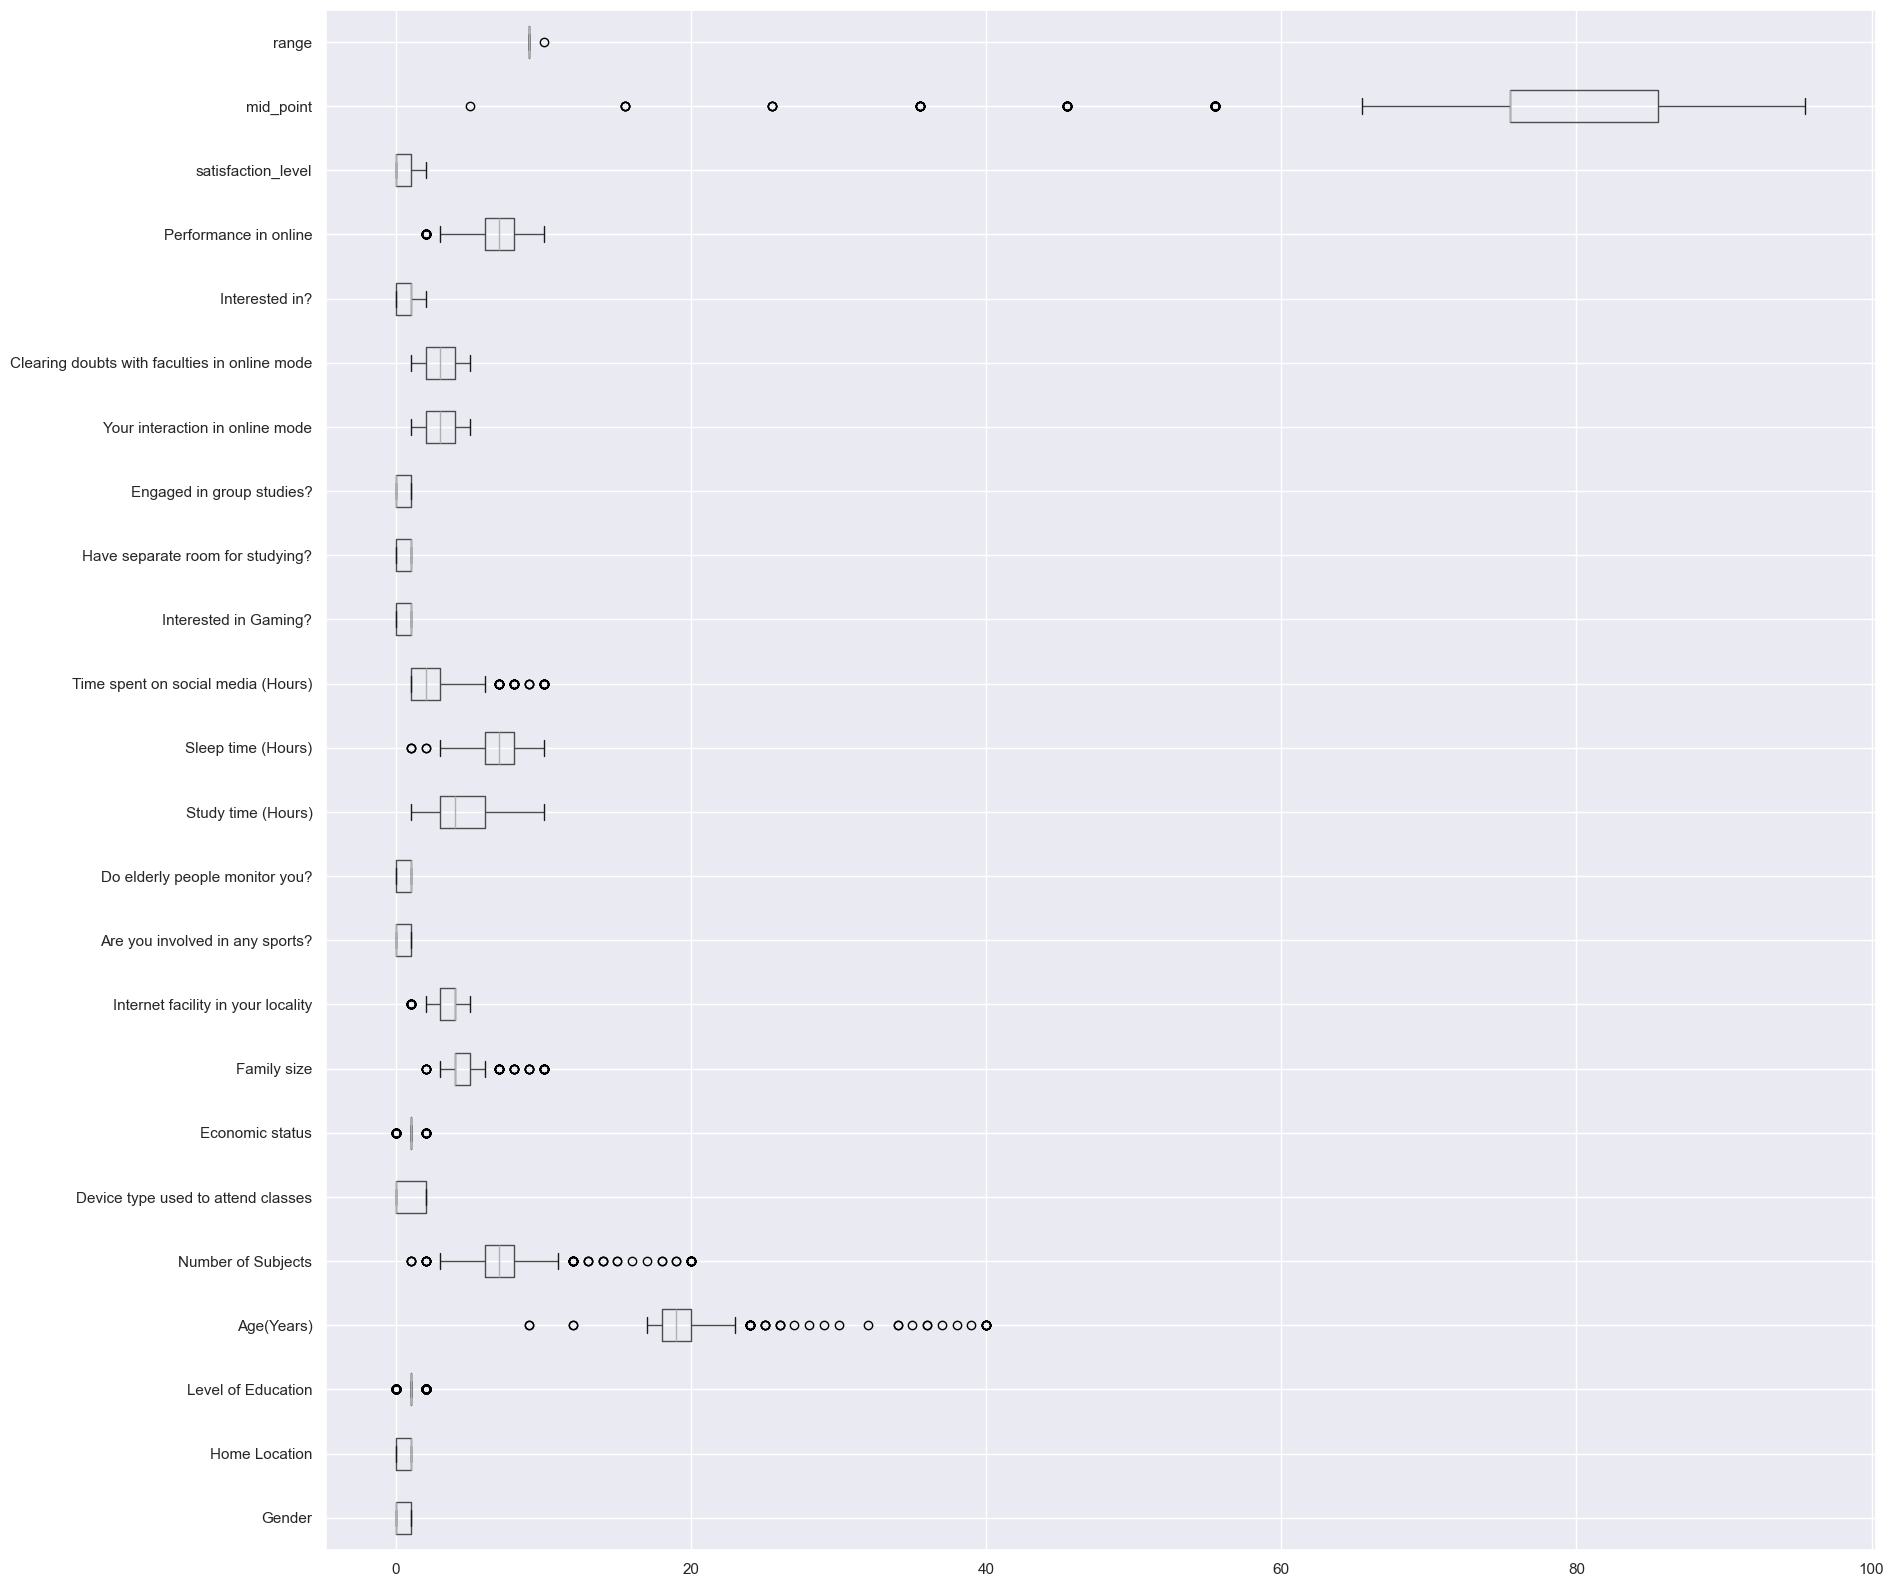

In [403]:
edu_train.boxplot(vert=False, figsize=(20,20))
plt.show()

In [404]:
edu_train.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,satisfaction_level,mid_point,range
0,0.0,0.0,2.0,18,8,0.0,1.0,10,2,1.0,1.0,8,7,2,1.0,0.0,1.0,1,2,0.0,4,1,85.5,9
1,1.0,0.0,1.0,18,6,2.0,1.0,5,2,0.0,1.0,5,6,2,1.0,0.0,0.0,5,5,2.0,10,2,75.5,9
2,1.0,0.0,1.0,20,3,2.0,1.0,6,4,0.0,1.0,2,7,2,0.0,1.0,0.0,4,3,0.0,7,2,85.5,9
3,0.0,0.0,1.0,20,8,0.0,1.0,7,5,0.0,0.0,6,7,2,0.0,1.0,0.0,4,4,2.0,7,0,75.5,9
4,1.0,1.0,2.0,22,9,2.0,1.0,6,3,1.0,1.0,5,7,2,0.0,0.0,0.0,4,3,0.0,7,2,75.5,9


Tidak dilakukan delete outlier karena tidak menganggu dan dapat mengakibatkan hilangnya informasi penting

**Memisahkan variabel dependen dan independen**

In [405]:
# Variabel independen
edu_x_train = edu_train.drop("satisfaction_level", axis=1)
edu_x_train.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,mid_point,range
0,0.0,0.0,2.0,18,8,0.0,1.0,10,2,1.0,1.0,8,7,2,1.0,0.0,1.0,1,2,0.0,4,85.5,9
1,1.0,0.0,1.0,18,6,2.0,1.0,5,2,0.0,1.0,5,6,2,1.0,0.0,0.0,5,5,2.0,10,75.5,9
2,1.0,0.0,1.0,20,3,2.0,1.0,6,4,0.0,1.0,2,7,2,0.0,1.0,0.0,4,3,0.0,7,85.5,9
3,0.0,0.0,1.0,20,8,0.0,1.0,7,5,0.0,0.0,6,7,2,0.0,1.0,0.0,4,4,2.0,7,75.5,9
4,1.0,1.0,2.0,22,9,2.0,1.0,6,3,1.0,1.0,5,7,2,0.0,0.0,0.0,4,3,0.0,7,75.5,9


In [406]:
# variabel dependen
edu_y_train = edu_train["satisfaction_level"]
edu_y_train.head()

0    1
1    2
2    2
3    0
4    2
Name: satisfaction_level, dtype: int32

**Data preprocessing untuk dataset Test**

In [407]:
edu_test.head()

,Id,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online
0,0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,Yes,3,6,1,No,No,No,91-100,1,1,Practical,6
1,2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,Yes,6,7,1,No,Yes,No,71-80,1,1,Both,6
2,6,Male,Urban,Under Graduate,19,5,Laptop,Middle Class,5,5,No,No,2,6,3,Yes,Yes,yes,81-90,4,3,Both,6
3,7,Male,Urban,Under Graduate,17,4,Laptop,Middle Class,4,4,Yes,Yes,4,8,6,No,Yes,No,61-70,3,3,Practical,6
4,10,Female,Urban,Under Graduate,18,4,Desktop,Middle Class,3,5,No,No,5,6,3,Yes,Yes,No,81-90,2,1,Practical,9


**Membagi data training dan testing**

In [408]:
x_edu_train, x_edu_valid, y_edu_train, y_edu_valid = train_test_split(edu_x_train, edu_y_train, test_size = 0.2, stratify=edu_y_train,random_state = 42)

**Standarisasi dengan min max scaler**

In [409]:
x_edu_train

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,mid_point,range
233,0.0,0.0,1.0,21,6,0.0,1.0,10,3,0.0,0.0,1,1,10,1.0,0.0,1.0,2,1,2.0,2,35.5,9
595,1.0,1.0,1.0,23,6,0.0,1.0,4,4,0.0,1.0,5,6,1,0.0,0.0,0.0,3,3,0.0,6,65.5,9
755,1.0,1.0,1.0,18,1,0.0,1.0,4,4,1.0,0.0,4,7,3,1.0,1.0,1.0,3,3,0.0,9,75.5,9
316,1.0,1.0,1.0,18,7,0.0,1.0,4,4,0.0,1.0,4,7,3,1.0,1.0,1.0,3,2,0.0,5,85.5,9
289,0.0,0.0,1.0,19,6,2.0,1.0,4,5,0.0,0.0,3,8,4,1.0,1.0,1.0,5,3,2.0,8,85.5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0.0,1.0,1.0,20,7,0.0,1.0,3,4,1.0,1.0,8,8,4,1.0,0.0,0.0,2,3,2.0,6,85.5,9
697,0.0,0.0,1.0,21,7,2.0,1.0,4,3,1.0,0.0,9,8,2,1.0,0.0,1.0,5,4,1.0,9,75.5,9
276,0.0,0.0,1.0,21,5,0.0,0.0,5,3,1.0,0.0,3,8,2,1.0,1.0,1.0,2,2,0.0,5,95.5,9
275,0.0,1.0,2.0,26,9,0.0,1.0,6,4,1.0,1.0,1,5,10,1.0,0.0,1.0,2,1,0.0,4,65.5,9


In [410]:
clean_edu_test

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,mid_point,range
0,0.0,1.0,1.0,18,11,0.0,1.0,4,5,0.0,1.0,3,6,1,0.0,0.0,0.0,1,1,0.0,6,95.5,9
1,0.0,0.0,1.0,18,5,0.0,1.0,5,2,0.0,1.0,6,7,1,0.0,1.0,0.0,1,1,1.0,6,75.5,9
2,0.0,1.0,1.0,19,5,0.0,1.0,5,5,0.0,0.0,2,6,3,1.0,1.0,1.0,4,3,1.0,6,85.5,9
3,0.0,1.0,1.0,17,4,0.0,1.0,4,4,1.0,1.0,4,8,6,0.0,1.0,0.0,3,3,0.0,6,65.5,9
4,1.0,1.0,1.0,18,4,1.0,1.0,3,5,0.0,0.0,5,6,3,1.0,1.0,0.0,2,1,0.0,9,85.5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1.0,0.0,1.0,20,3,2.0,1.0,3,2,0.0,0.0,4,6,2,0.0,1.0,1.0,3,3,2.0,5,75.5,9
203,1.0,0.0,1.0,19,5,2.0,1.0,4,2,1.0,1.0,8,7,4,1.0,1.0,0.0,4,4,0.0,8,75.5,9
204,1.0,0.0,1.0,21,6,2.0,1.0,4,5,0.0,0.0,6,6,3,1.0,1.0,0.0,5,5,2.0,10,75.5,9
205,1.0,0.0,1.0,19,3,2.0,1.0,6,5,1.0,1.0,4,8,4,1.0,1.0,1.0,4,4,2.0,8,95.5,9


In [411]:
x_edu_train_scaled = scaler.fit_transform(x_edu_train)
x_edu_valid_scaled = scaler.transform(x_edu_valid)
clean_edu_test_scaled = scaler.transform(clean_edu_test)

In [412]:
# # Create a dictionary mapping for each unique class
# class_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# # Check the mapping
# print(class_mapping)


In [413]:
clean_edu_test_scaled

array([[0.        , 1.        , 0.5       , ..., 0.5       , 1.        ,
        0.        ],
       [0.        , 0.        , 0.5       , ..., 0.5       , 0.77900552,
        0.        ],
       [0.        , 1.        , 0.5       , ..., 0.5       , 0.88950276,
        0.        ],
       ...,
       [1.        , 0.        , 0.5       , ..., 1.        , 0.77900552,
        0.        ],
       [1.        , 0.        , 0.5       , ..., 0.75      , 1.        ,
        0.        ],
       [1.        , 0.        , 0.5       , ..., 0.5       , 0.66850829,
        0.        ]])

**Menggunakan KNN untuk melatih model**

In [414]:
EDU_N_NEIGHBORS = 10
edu_kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [415]:
edu_KNN_euclidean = KNeighborsClassifier(n_neighbors=EDU_N_NEIGHBORS, metric='manhattan')
edu_KNN_euclidean.fit(x_edu_train_scaled, y_edu_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [416]:
edu_cross_eval = cross_val_score(edu_KNN_euclidean, x_edu_train_scaled, y_edu_train, scoring='accuracy', cv=edu_kfold)
print(f'Hasil Evaluasi cross validation: {edu_cross_eval.mean()}')

Hasil Evaluasi cross validation: 0.5621212121212121


In [417]:
edu_y_pred = edu_KNN_euclidean.predict(x_edu_valid_scaled)


In [418]:
evaluate_classifier_performance(edu_y_pred, y_edu_valid)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.54      0.83      0.65        84
           1       0.58      0.34      0.43        41
           2       0.58      0.17      0.26        41

    accuracy                           0.55       166
   macro avg       0.57      0.45      0.45       166
weighted avg       0.56      0.55      0.50       166



Confusion Matrix



prediction,0,1,2
actual,,,
0,70,9,5
1,27,14,0
2,33,1,7




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.5481927710843374
F1 Macro Average: 0.44970859388069756
F1 Micro Average: 0.5481927710843374
Precision Macro Average: 0.5683760683760685
Precision Micro Average: 0.5481927710843374
Recall Macro Average: 0.44850948509485095
Recall Micro Average: 0.5481927710843374



In [419]:
# Optimalisasi KNN dengan gridsearch CV
# import Grid Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

edu_skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)


edu_model = KNeighborsClassifier()
edu_tunned_params = [{'n_neighbors': [5, 10, 15, 20, 25],
                      'metric': ['euclidean', 'manhattan', 'jaccard', 'cosine', "l1", "l2"],
                      'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                      }]

print("Tuning hyper-parameters model KNN")
print()

edu_clfKNN = GridSearchCV(
    edu_model,
    edu_tunned_params,
    scoring="accuracy",
    cv=edu_skf,
    verbose = 2
)

edu_clfKNN.fit(x_edu_train_scaled, y_edu_train)

print()
print("Best parameters set found on development set:")
print(edu_clfKNN.best_params_)
print()
print("Detailed classification report:")
edu_y_tune_true, edu_y_tune_pred = y_edu_valid, edu_clfKNN.predict(x_edu_valid_scaled)
evaluate_classifier_performance(edu_y_tune_pred, edu_y_tune_true)
print()

Tuning hyper-parameters model KNN

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END algorithm=ball_tree, metric=euclidean, n_neighbors=10; total time=   0.

d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\

[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=15; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=15; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=15; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=15; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=15; total time=   0.0s
[CV] END ....algorithm=brute

d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\

[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=20; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=20; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=20; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=25; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=25; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=25; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=25; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=25; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=25; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=25; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=25; total time=   0.0s
[CV] END ....algorithm=brute, metric=jaccard, n_neighbors=25; total time=   0.0s
[CV] END ....algorithm=brute

d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....algorithm=brute, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=brute, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=brute, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=brute, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=brute, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=brute, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=brute, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=brute, metric=cosine, n_neighbors=15; total time=   0.0s
[CV] END .....algorithm=brute, metric=cosine, n_neighbors=15; total time=   0.0s
[CV] END .....algorithm=brute, metric=cosine, n_neighbors=15; total time=   0.0s
[CV] END .....algorithm=brute, metric=cosine, n_neighbors=15; total time=   0.0s
[CV] END .....algorithm=brute, metric=cosine, n_neighbors=15; total time=   0.0s
[CV] END .....algorithm=brut

d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\

[CV] END ......algorithm=auto, metric=jaccard, n_neighbors=5; total time=   0.0s
[CV] END ......algorithm=auto, metric=jaccard, n_neighbors=5; total time=   0.0s
[CV] END ......algorithm=auto, metric=jaccard, n_neighbors=5; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=10; total time=   0.0s
[CV] END .....algorithm=auto

d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
d:\KULIAH\kasdad\lab5\env\lib\

[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=20; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=20; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=20; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=20; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=20; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=20; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=20; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=20; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=25; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=25; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=25; total time=   0.0s
[CV] END .....algorithm=auto, metric=jaccard, n_neighbors=25; total time=   0.0s
[CV] END .....algorithm=auto

d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\metrics\pairwise.py:2182: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .......algorithm=auto, metric=cosine, n_neighbors=5; total time=   0.0s
[CV] END .......algorithm=auto, metric=cosine, n_neighbors=5; total time=   0.0s
[CV] END ......algorithm=auto, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END ......algorithm=auto, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END ......algorithm=auto, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END ......algorithm=auto, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END ......algorithm=auto, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END ......algorithm=auto, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END ......algorithm=auto, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END ......algorithm=auto, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END ......algorithm=auto, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END ......algorithm=auto, metric=cosine, n_neighbors=10; total time=   0.0s
[CV] END ......algorithm=aut

d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\KULIAH\kasdad\lab5\env\lib\site-packages\sklearn\neighbors\_classification.py", line 233, in fit
    return self._fit(X, y)
  File "d:\KULIAH\kasdad\lab

prediction,0,1,2
actual,,,
0,77,2,5
1,27,14,0
2,34,0,7




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.5903614457831325
F1 Macro Average: 0.48302423575511955
F1 Micro Average: 0.5903614457831325
Precision Macro Average: 0.6721014492753623
Precision Micro Average: 0.5903614457831325
Recall Macro Average: 0.4762872628726287
Recall Micro Average: 0.5903614457831325




In [420]:
result = edu_KNN_euclidean.predict(clean_edu_test_scaled)

In [421]:
result

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0])

In [422]:

prediction_df = pd.DataFrame({
    "Id": edu_test["Id"],
    "satisfaction_level": result
})

prediction_df["satisfaction_level"] = labelencode.inverse_transform(prediction_df["satisfaction_level"])

jawaban = []

for data in prediction_df["satisfaction_level"]:
    if data == "Bad":
        jawaban.append(1)
    elif data == "Average":
        jawaban.append(2)
    else:
        jawaban.append(3)
        
prediction_df["satisfaction_level"] = jawaban

prediction_df.to_csv('BayesKnnPredictionHalf.csv', index=False)



**train with all data**

In [423]:
all_scaled_x = scaler.fit_transform(edu_x_train)

In [424]:
all_KNN_Manhattan = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
all_KNN_Manhattan.fit(all_scaled_x, edu_y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [425]:
all_cross_eval = cross_val_score(all_KNN_Manhattan, all_scaled_x, edu_y_train, scoring='accuracy', cv=edu_kfold)
print(f'Hasil Evaluasi cross validation: {all_cross_eval.mean()}')

Hasil Evaluasi cross validation: 0.5800617102556567


In [426]:
# clear_edu_test_scaled

In [427]:
prediction = all_KNN_Manhattan.predict(clean_edu_test_scaled)

In [428]:
prediction

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0])

In [429]:

prediction_df = pd.DataFrame({
    "Id": edu_test["Id"],
    "satisfaction_level": prediction
})

prediction_df["satisfaction_level"] = labelencode.inverse_transform(prediction_df["satisfaction_level"])

jawaban = []

for data in prediction_df["satisfaction_level"]:
    if data == "Bad":
        jawaban.append(1)
    elif data == "Average":
        jawaban.append(2)
    else:
        jawaban.append(3)
        
prediction_df["satisfaction_level"] = jawaban

prediction_df.to_csv('KnnPrediction.csv', index=False)



## Bayes

In [430]:
edu_x_train.shape

(826, 23)

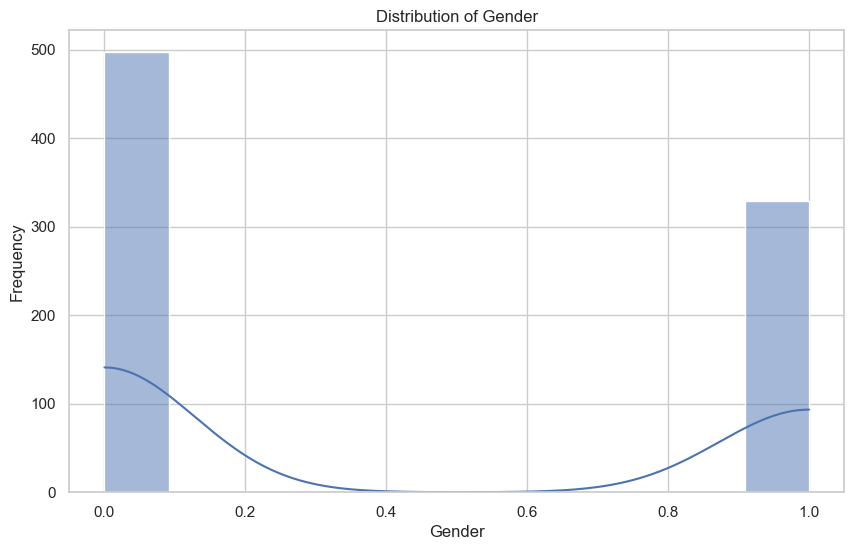

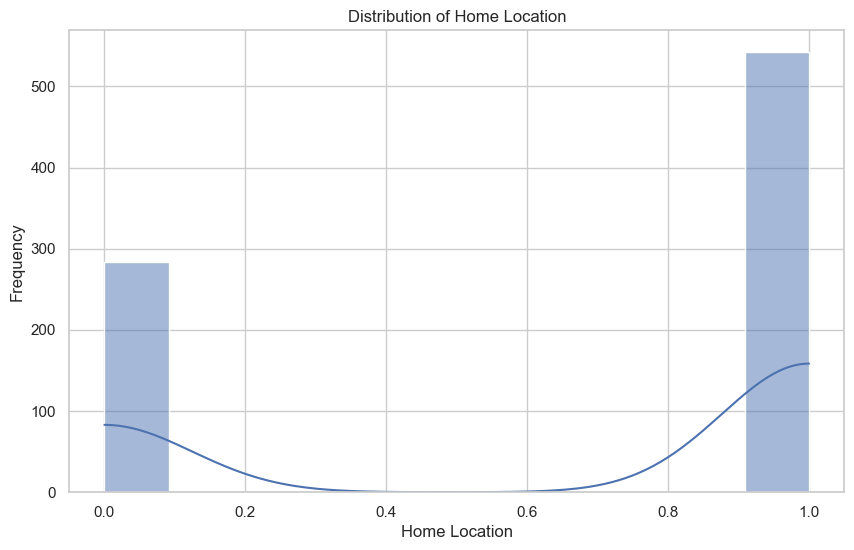

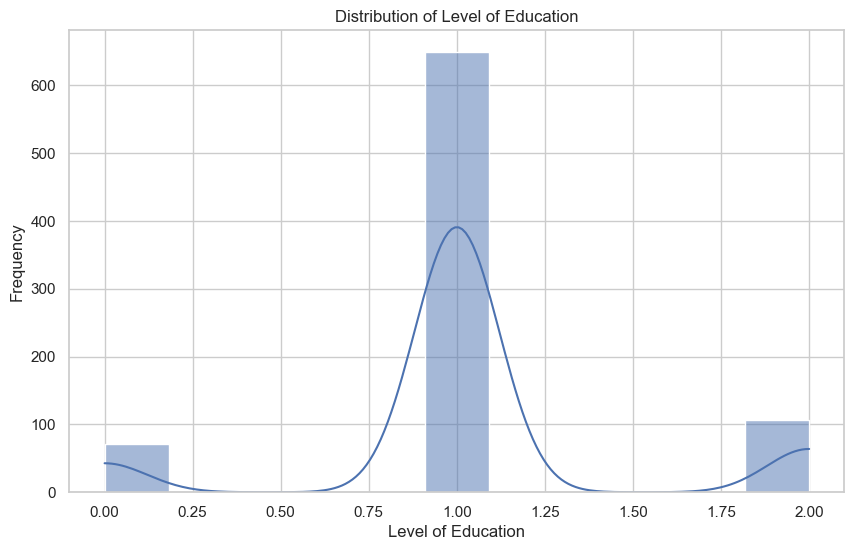

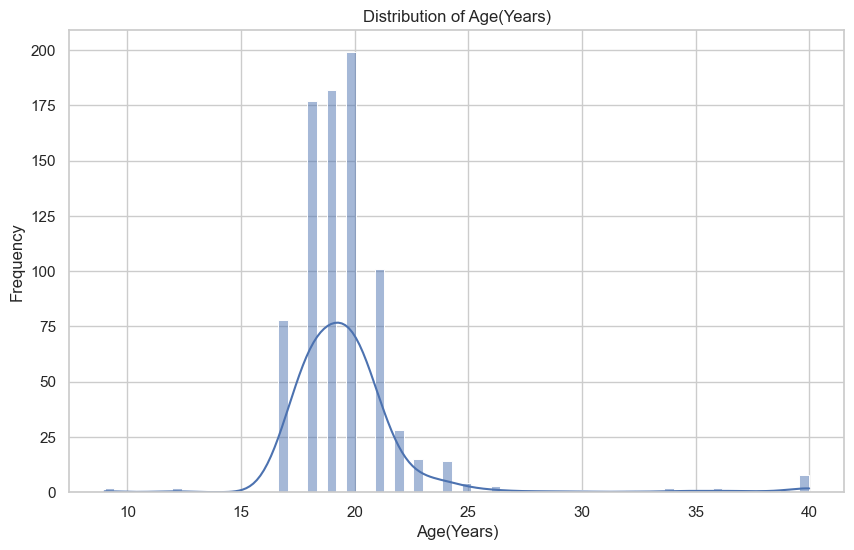

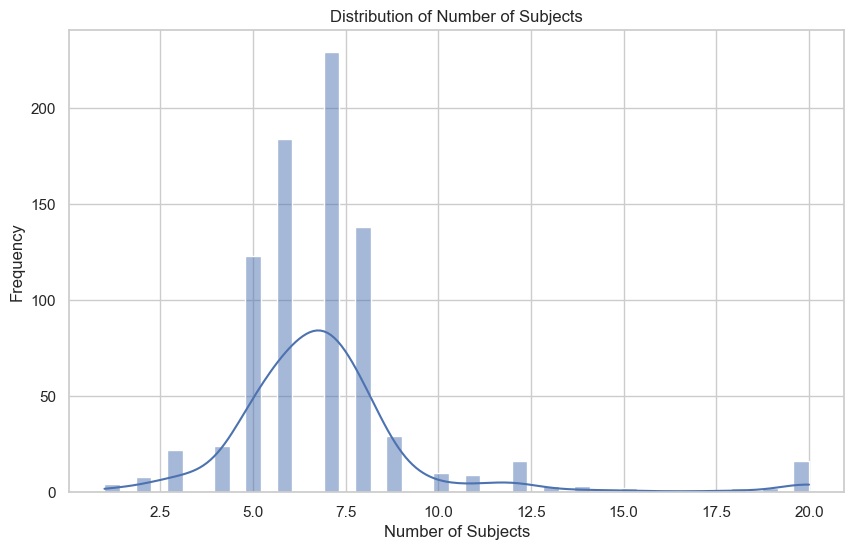

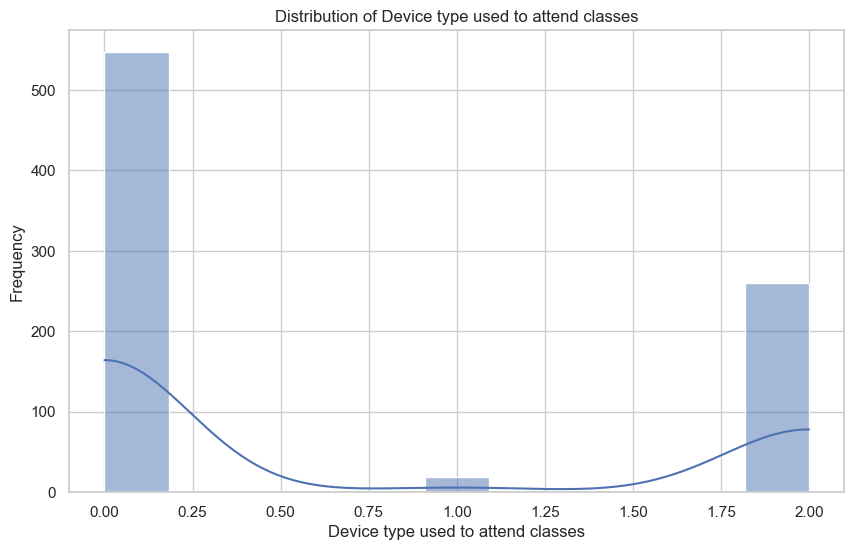

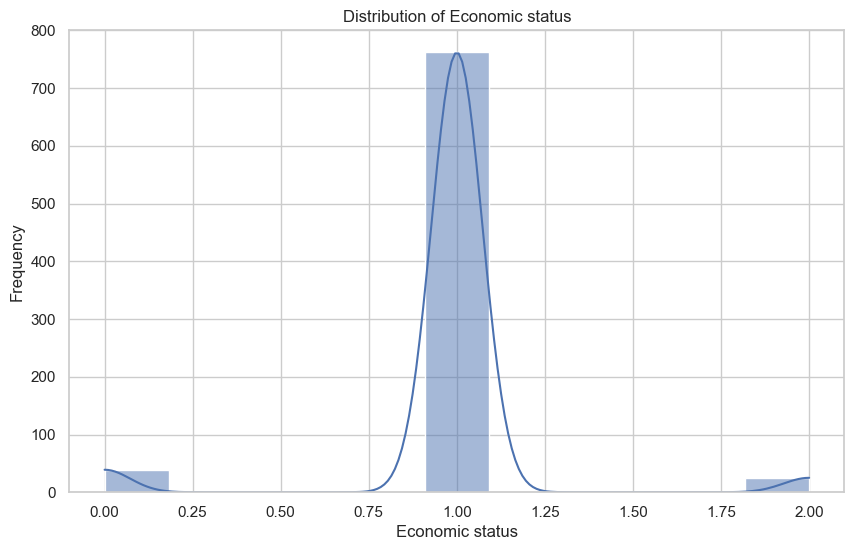

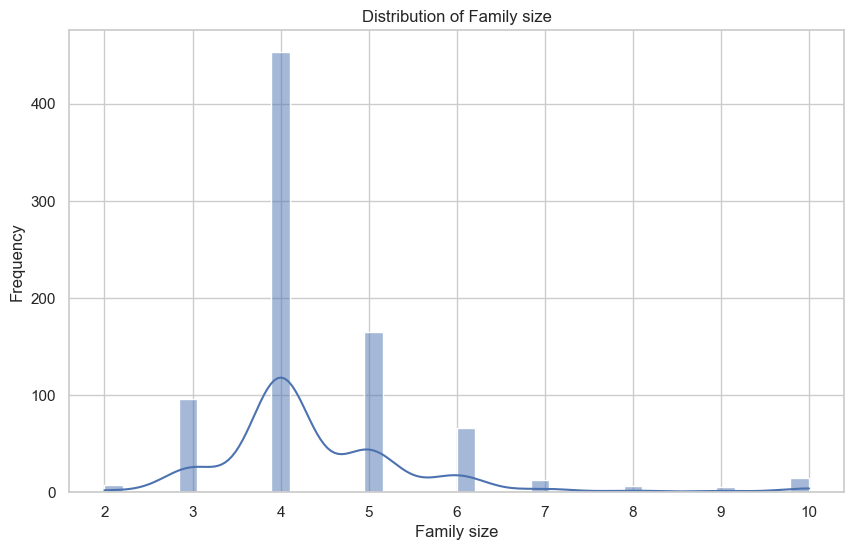

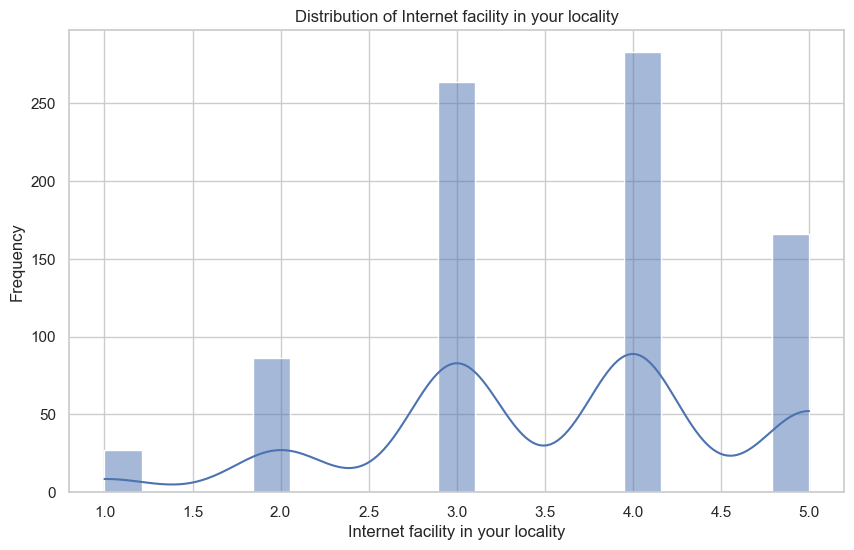

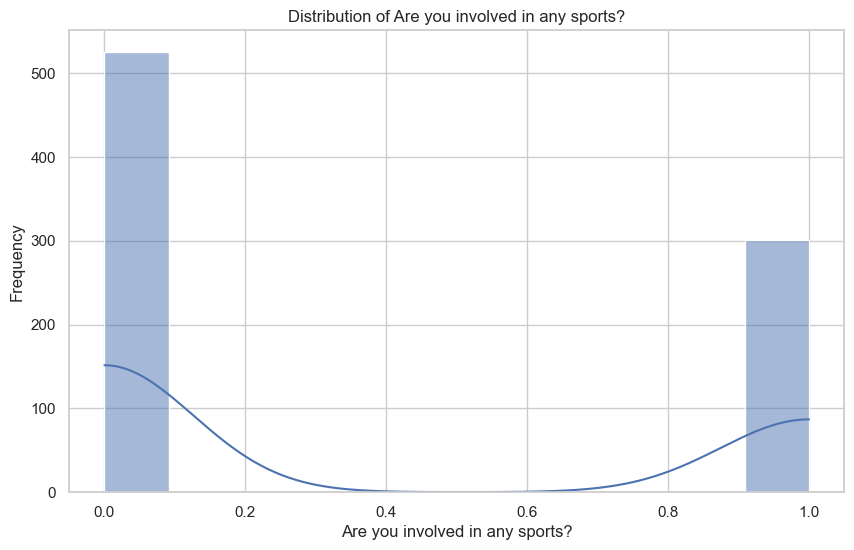

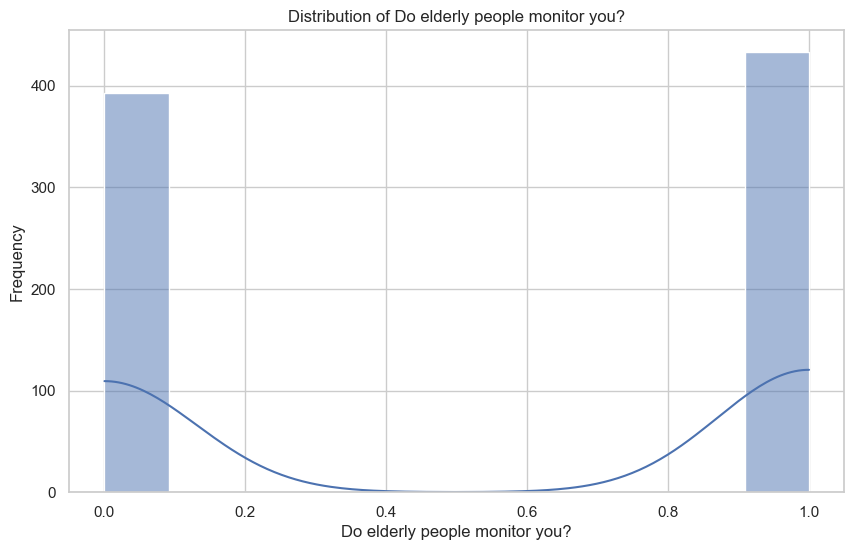

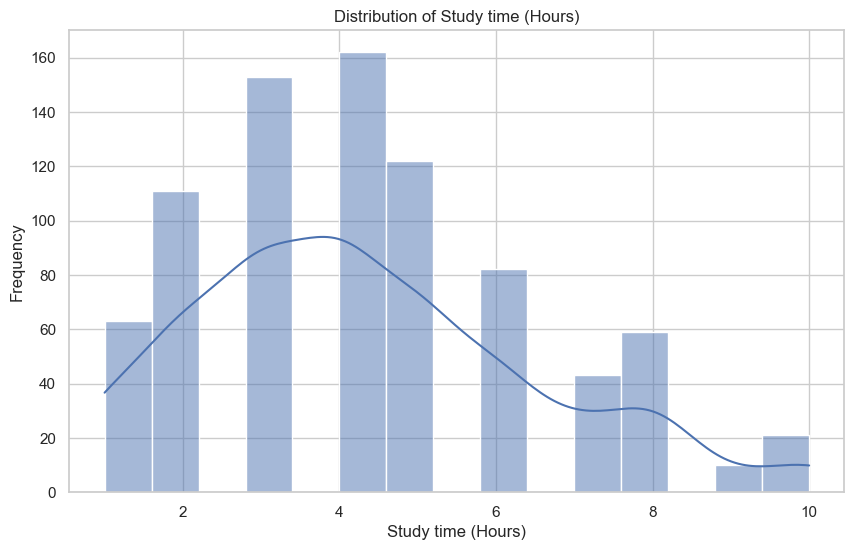

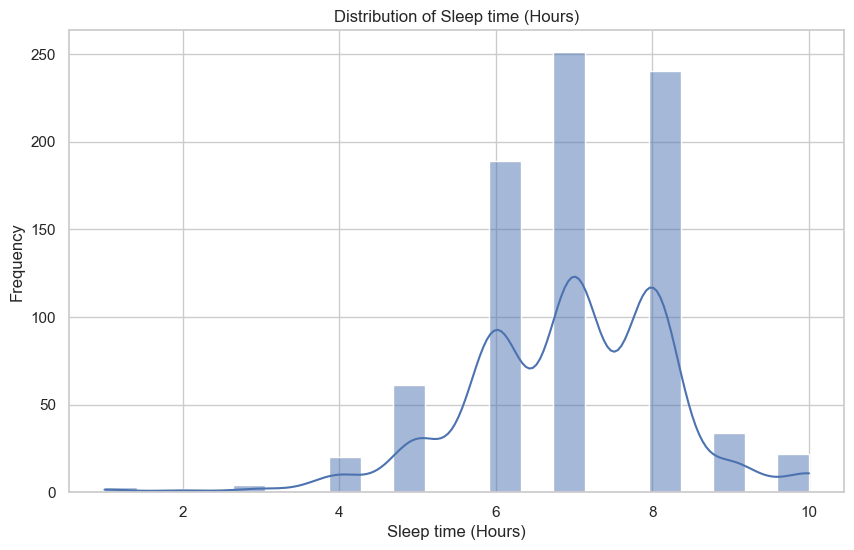

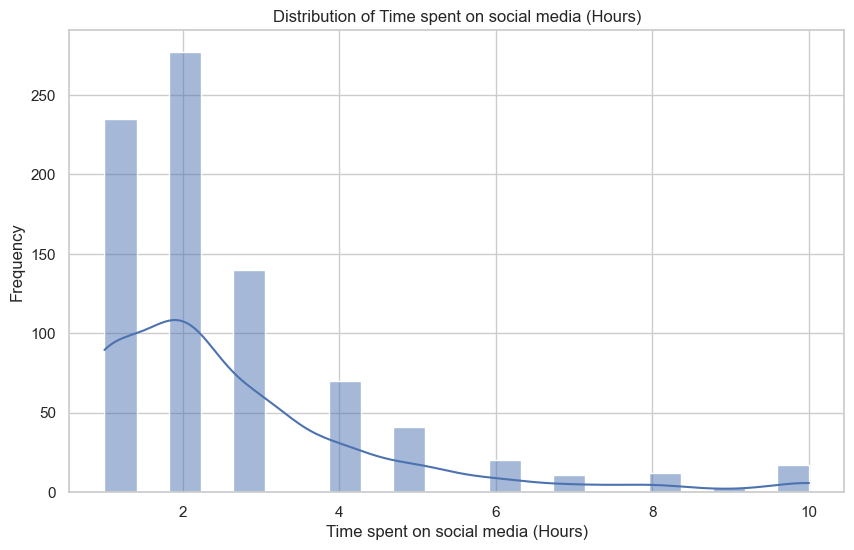

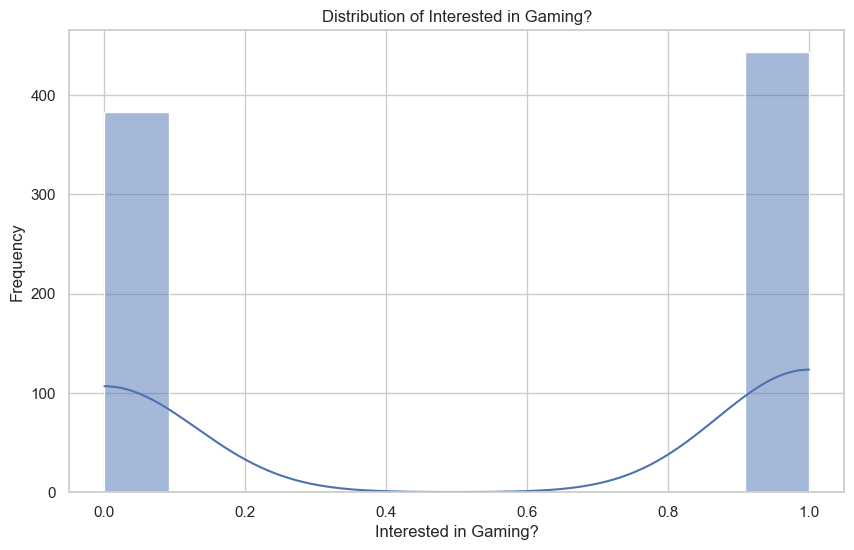

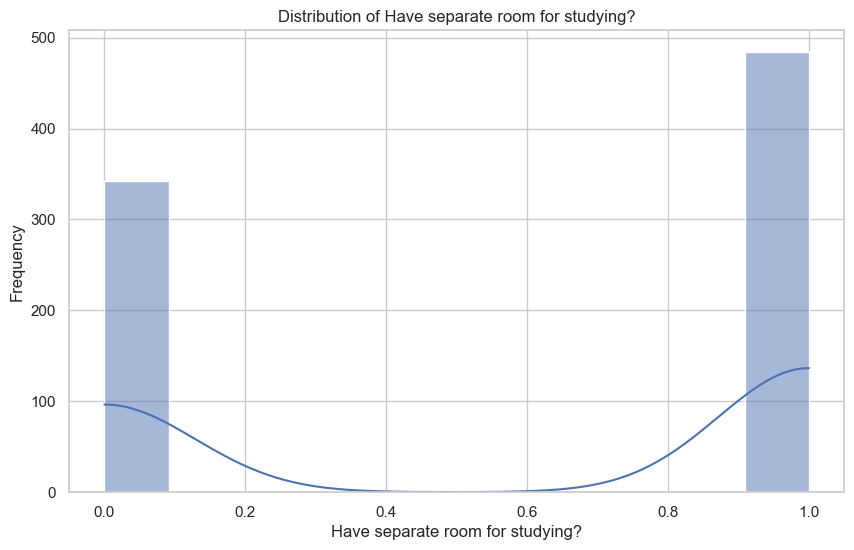

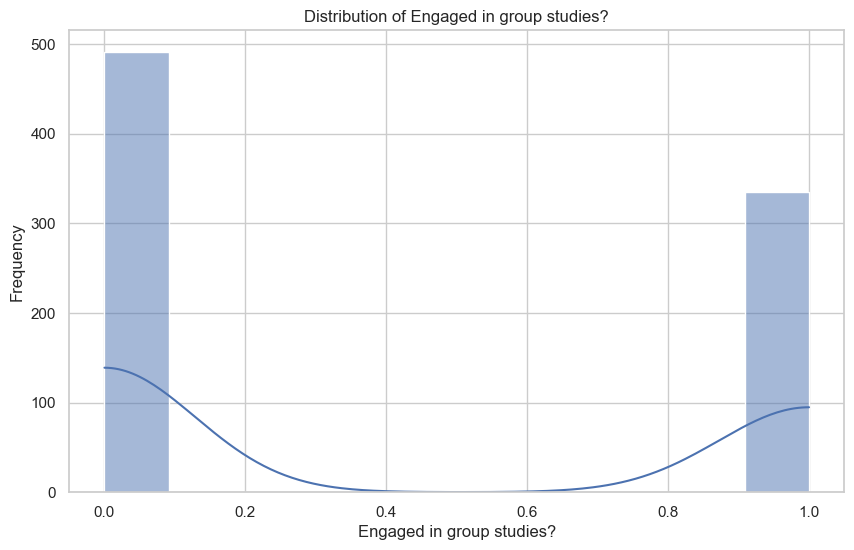

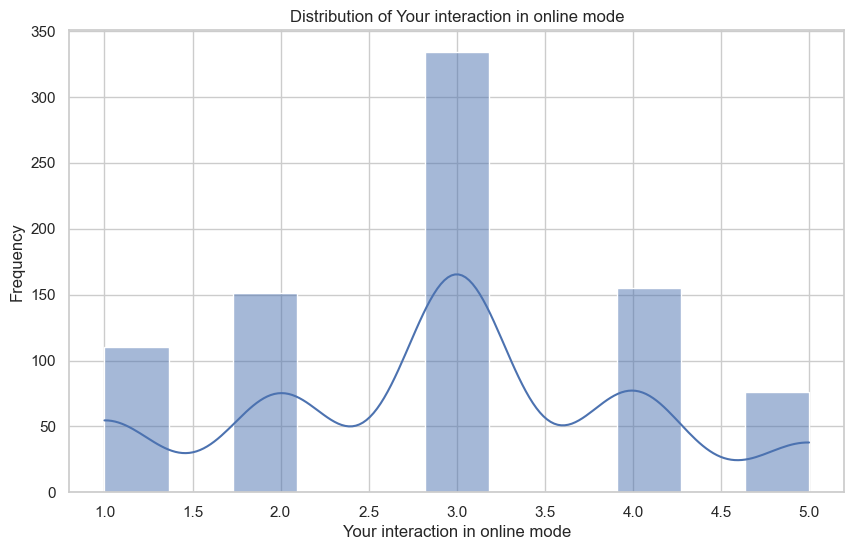

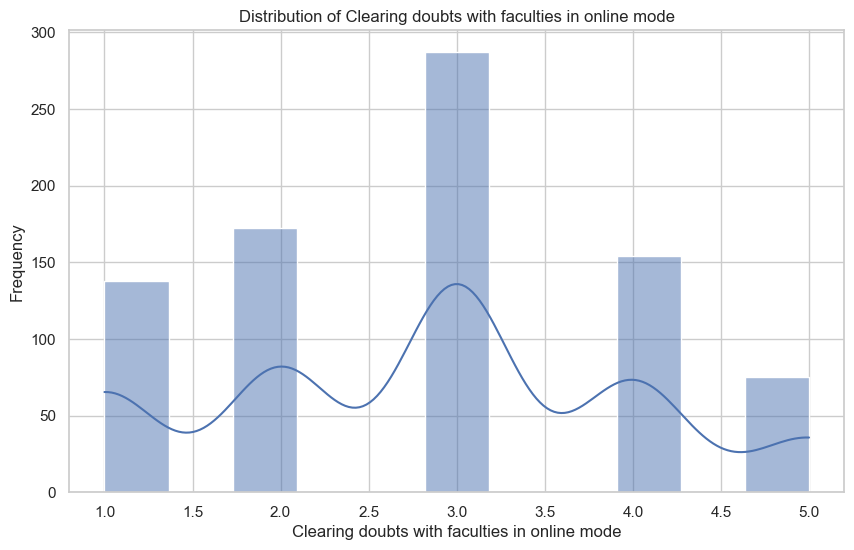

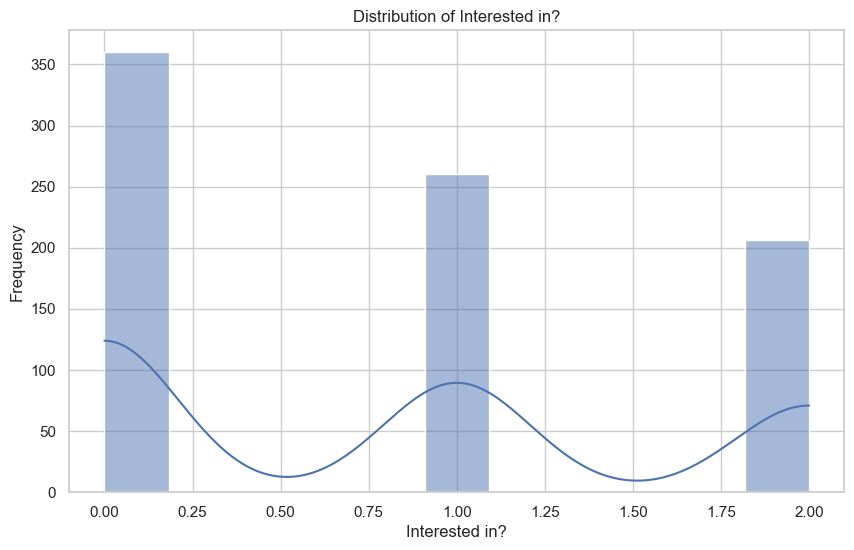

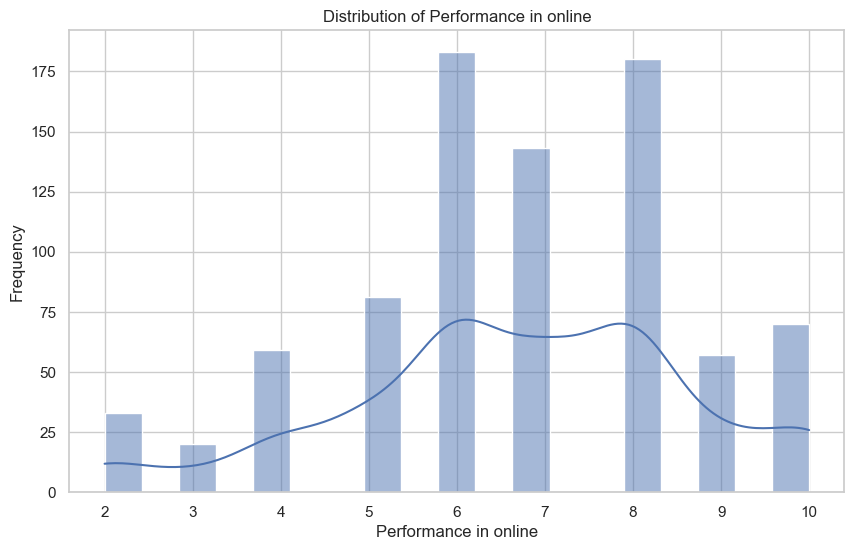

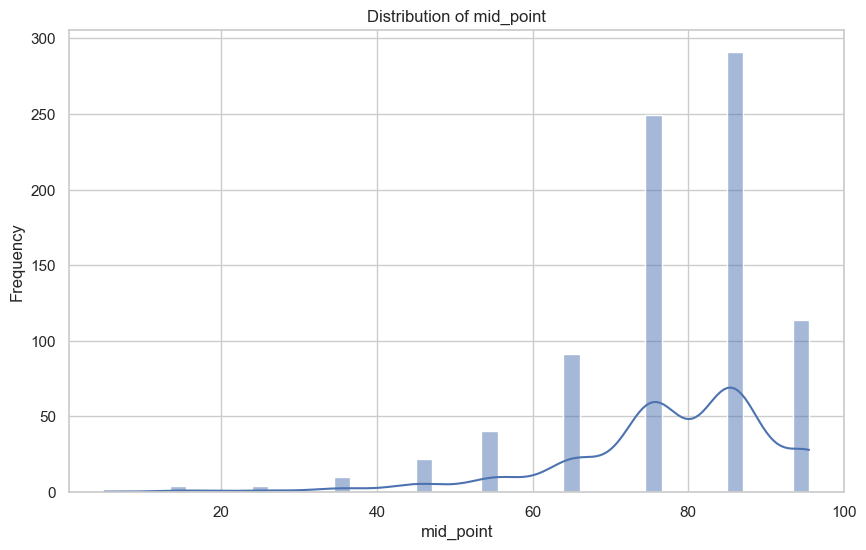

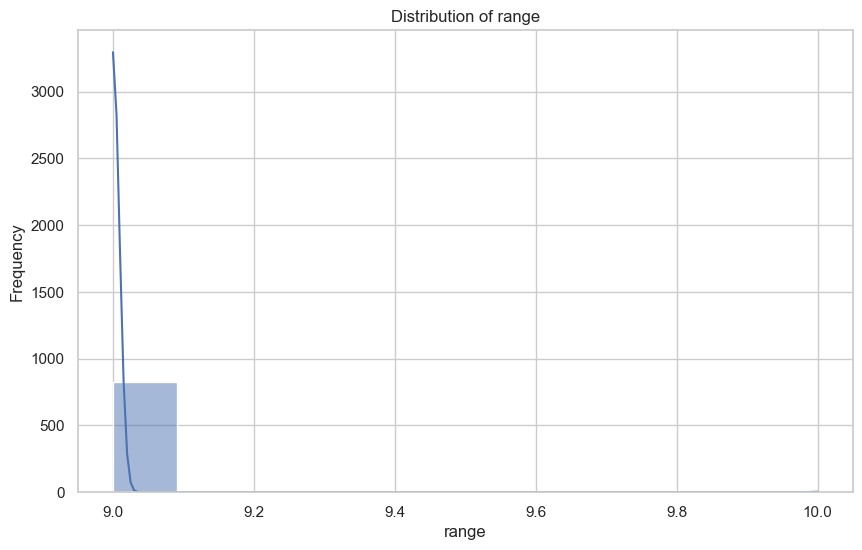

In [431]:
sns.set_style('whitegrid')

# Loop through each column to create a distribution plot for each one
for column in edu_x_train.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(edu_x_train[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [432]:
edu_x_train["range"].value_counts()

range
9     825
10      1
Name: count, dtype: int64

Dari informasi di atas dapat dilihat bahwa distribusinya hanya berbeda 1 nilai data sehingga dapat kita lakukan drop column

In [433]:
edu_x_train_drop = edu_x_train.drop(["range"], axis=1)
clean_edu_test_drop = clean_edu_test.drop(["range"],axis=1)

In [434]:
from sklearn.preprocessing import StandardScaler
standar_scaler = StandardScaler()

In [435]:
edu_x_train_scaled = standar_scaler.fit_transform(edu_x_train_drop)
edu_x_test_scaled = standar_scaler.transform(clean_edu_test_drop)

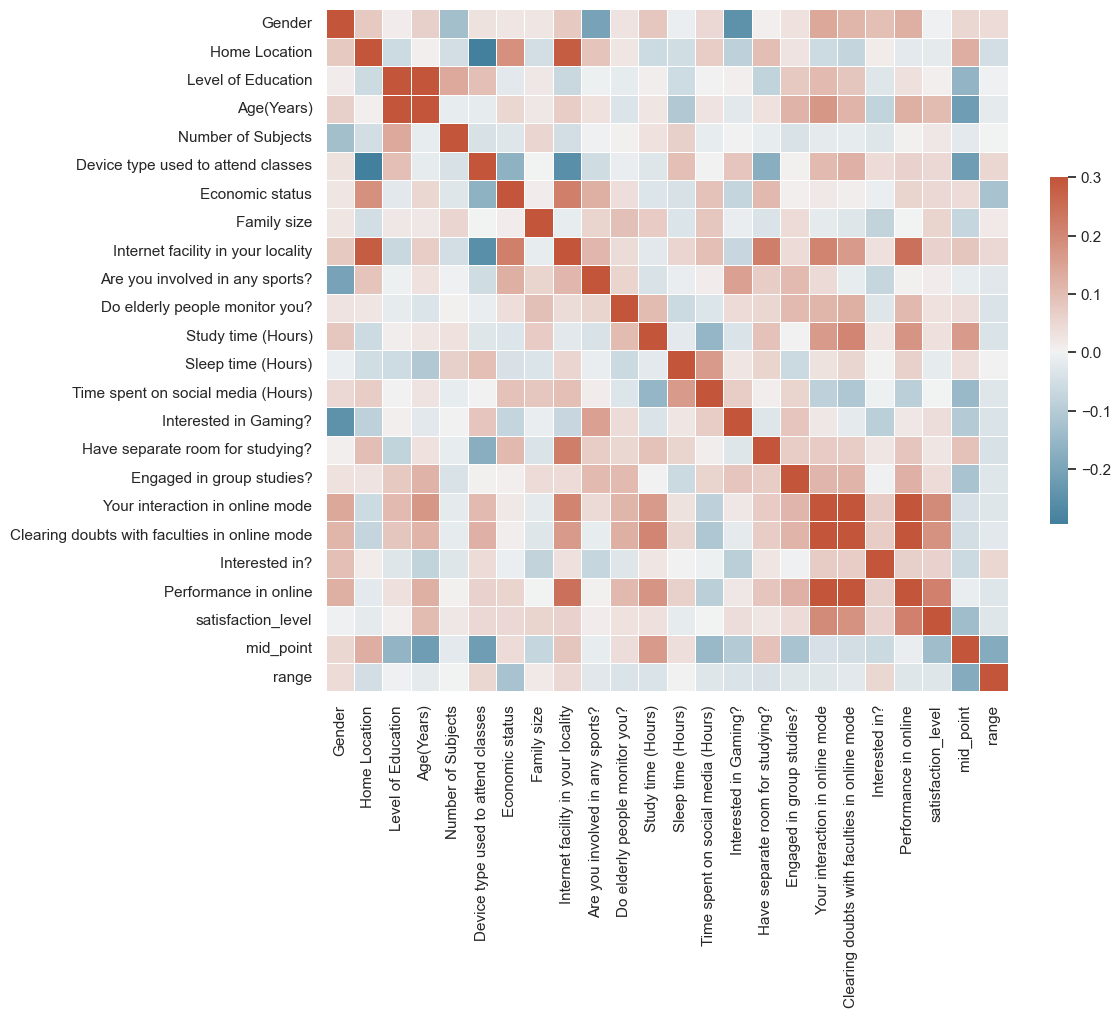

In [436]:
# Calculate the correlation matrix
edu_corr = edu_train.corr()

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(edu_corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()





In [437]:
selector = SelectKBest(chi2, k=16)
selected_x_edu_test = selector.fit_transform(edu_x_train, edu_y_train)

# This will tell us which columns were selected
selected_features = selector.get_support(indices=True)

# If you have the original dataframe (before scaling) you can get the feature names as follows:
feature_names = list(edu_x_train.columns[selected_features])

print("Selected features indices:", selected_features)
print("Selected features names:", feature_names)

Selected features indices: [ 0  1  3  4  5  8  9 10 11 13 16 17 18 19 20 21]
Selected features names: ['Gender', 'Home Location', 'Age(Years)', 'Number of Subjects', 'Device type used to attend classes', 'Internet facility in your locality', 'Are you involved in any sports?', 'Do elderly people monitor you?', 'Study time (Hours)', 'Time spent on social media (Hours)', 'Engaged in group studies?', 'Your interaction in online mode', 'Clearing doubts with faculties in online mode', 'Interested in?', 'Performance in online', 'mid_point']


In [438]:
selected_x_edu_train = selector.transform(edu_x_train)
selected_x_edu_train.shape

(826, 16)

In [439]:
selected_x_edu_test = selector.transform(clean_edu_test)
selected_x_edu_test.shape

(207, 16)

In [440]:
edu_test["Internet facility in your locality"]

0      5
1      2
2      5
3      4
4      5
      ..
202    2
203    2
204    5
205    5
206    3
Name: Internet facility in your locality, Length: 207, dtype: int64

try one hot encoding

In [441]:
edu_one_coded_train = pd.get_dummies(edu_x_train, columns=["Economic status", "Interested in?", "Device type used to attend classes", "Level of Education"])
edu_one_coded_test = pd.get_dummies(clean_edu_test, columns=["Economic status", "Interested in?", "Device type used to attend classes", "Level of Education"])

In [442]:
edu_one_coded_test

,Gender,Home Location,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online,mid_point,range,Economic status_0.0,Economic status_1.0,Economic status_2.0,Interested in?_0.0,Interested in?_1.0,Interested in?_2.0,Device type used to attend classes_0.0,Device type used to attend classes_1.0,Device type used to attend classes_2.0,Level of Education_0.0,Level of Education_1.0,Level of Education_2.0
0,0.0,1.0,18,11,4,5,0.0,1.0,3,6,1,0.0,0.0,0.0,1,1,6,95.5,9,False,True,False,True,False,False,True,False,False,False,True,False
1,0.0,0.0,18,5,5,2,0.0,1.0,6,7,1,0.0,1.0,0.0,1,1,6,75.5,9,False,True,False,False,True,False,True,False,False,False,True,False
2,0.0,1.0,19,5,5,5,0.0,0.0,2,6,3,1.0,1.0,1.0,4,3,6,85.5,9,False,True,False,False,True,False,True,False,False,False,True,False
3,0.0,1.0,17,4,4,4,1.0,1.0,4,8,6,0.0,1.0,0.0,3,3,6,65.5,9,False,True,False,True,False,False,True,False,False,False,True,False
4,1.0,1.0,18,4,3,5,0.0,0.0,5,6,3,1.0,1.0,0.0,2,1,9,85.5,9,False,True,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1.0,0.0,20,3,3,2,0.0,0.0,4,6,2,0.0,1.0,1.0,3,3,5,75.5,9,False,True,False,False,False,True,False,False,True,False,True,False
203,1.0,0.0,19,5,4,2,1.0,1.0,8,7,4,1.0,1.0,0.0,4,4,8,75.5,9,False,True,False,True,False,False,False,False,True,False,True,False
204,1.0,0.0,21,6,4,5,0.0,0.0,6,6,3,1.0,1.0,0.0,5,5,10,75.5,9,False,True,False,False,False,True,False,False,True,False,True,False
205,1.0,0.0,19,3,6,5,1.0,1.0,4,8,4,1.0,1.0,1.0,4,4,8,95.5,9,False,True,False,False,False,True,False,False,True,False,True,False


In [443]:
from sklearn.naive_bayes import ComplementNB, BernoulliNB

gaussian_cols = ["Age(Years)",
                 "Number of Subjects",
                 "Family size",
                 "Study time (Hours)",
                 "Sleep time (Hours)",
                 "Time spent on social media (Hours)",
                 "Performance in online",
                 "mid_point"
                 ]

bernoulli_cols = ["Gender", 
                  "Home Location",
                  "Are you involved in any sports?",
                  "Do elderly people monitor you?",
                  "Interested in Gaming?",
                  "Have separate room for studying?",
                  "Engaged in group studies?",
                  "Economic status_0.0",
                  "Economic status_1.0",
                  "Economic status_2.0",
                  "Interested in?_0.0",
                  "Interested in?_1.0",
                  "Interested in?_2.0",
                  "Device type used to attend classes_0.0",
                  "Device type used to attend classes_1.0",
                  "Device type used to attend classes_2.0",
                  "Level of Education_0.0",
                  "Level of Education_1.0",
                  "Level of Education_2.0",
                  ]

categorical_cols = [
    # "Level of Education",
    # "Device type used to attend classes", 
    # "Economic status", 
    "Internet facility in your locality", 
    "Your interaction in online mode", 
    "Clearing doubts with faculties in online mode", 
    # "Interested in?"
    ]


# categorical_cols = ['Gender', 'Home Location', 'Level of Education', 
#        'Device type used to attend classes',
#        'Economic status',  
#        'Are you involved in any sports?', 'Do elderly people monitor you?',
#        'Interested in Gaming?',
#        'Have separate room for studying?', 'Engaged in group studies?',
#        'Interested in?'
#        ]
# continuous_cols = [col for col in edu_x_train.columns if col not in categorical_cols and col != 'satisfaction_level']

# print()

edu_x_train_gaussian = edu_one_coded_train[gaussian_cols]
edu_x_train_bernoulli   = edu_one_coded_train[bernoulli_cols]
edu_x_train_categorical   = edu_one_coded_train[categorical_cols]

edu_x_test_gaussian = edu_one_coded_test[gaussian_cols]
edu_x_test_bernoulli   = edu_one_coded_test[bernoulli_cols]
edu_x_test_categorical   = edu_one_coded_test[categorical_cols]

# edu_x_train_wanted = selected_x_edu_train
# edu_x_test_wanted = selected_x_edu_test


In [444]:
edu_model_gnb = GaussianNB() # For numeric
edu_model_gnb.fit(edu_x_train_gaussian, edu_y_train)

GaussianNB()

In [445]:
edu_model_bnb = BernoulliNB() # For numeric
edu_model_bnb.fit(edu_x_train_bernoulli, edu_y_train)

BernoulliNB()

In [446]:
edu_model_cnb = CategoricalNB() # For complement
edu_model_cnb.fit(edu_x_train_categorical, edu_y_train)

CategoricalNB()

In [447]:
edu_gaussian_posteriors = edu_model_gnb.predict_proba(edu_x_test_gaussian)
edu_bernoulli_posteriors = edu_model_bnb.predict_proba(edu_x_test_bernoulli)
edu_categorical_posteriors = edu_model_cnb.predict_proba(edu_x_test_categorical)

# print(edu_categorical_posteriors)
# print(edu_numerical_posteriors)

edu_combined_probabilities = edu_categorical_posteriors * edu_gaussian_posteriors * edu_bernoulli_posteriors

# Get the class with the highest combined probability as the final prediction
# Bisa dikatakan juga sebagai hasil prediksi dari data uji yang ada
edu_final_predictions = np.argmax(edu_combined_probabilities, axis=1)
# edu_numerical_posteriors
# edu_combined_probabilities
edu_final_predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 0], dtype=int64)

In [448]:
edu_final_predictions = labelencode.inverse_transform(edu_final_predictions)
edu_final_predictions

# hasil = []

# for data in edu_combined_probabilities:
#     if data[0] > data[1] and data[0] >data[2]:
#         hasil.append(1)
#     elif data[1] > data[0] and data[1] > data[2]:
#         hasil.append(2)
#     else:
#         hasil.append(3)

array(['Bad', 'Bad', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Good', 'Average', 'Good', 'Good', 'Average',
       'Average', 'Good', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'Bad', 'Average', 'Average', 'Average',
       'Bad', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Bad', 'Average', 'Bad', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Bad',
       'Average', 'Average', 'Average', 'Bad', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Bad',
       'Average', 'Bad', 'Average', 'Average', 'Good', 'Average',
       'Average', 'Average', 'Average', 'Average', 'Bad', 'Average',
       'Average', 'Bad', '

In [449]:
jawaban = []

for data in edu_final_predictions:
    if data == "Bad":
        jawaban.append(1)
    elif data == "Average":
        jawaban.append(2)
    else:
        jawaban.append(3)

In [450]:
jawaban

[1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 1,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 2]

In [451]:
prediction_df = pd.DataFrame({
    "Id": edu_test["Id"],
    "satisfaction_level": jawaban
})

# prediction_df["satisfaction_level"] = labelencode.inverse_transform(prediction_df["satisfaction_level"])

# jawaban = []

# for data in prediction_df["satisfaction_level"]:
#     if data == "Bad":
#         jawaban.append(1)
#     elif data == "Average":
#         jawaban.append(2)
#     else:
#         jawaban.append(3)
        
# prediction_df["satisfaction_level"] = jawaban

prediction_df.to_csv('BayesPrediction.csv', index=False)

